# Importing and Preparation

In [1]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [2]:
from ipynb.fs.full.data_preparation import application

In [3]:
data = application.copy()
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH'] * -1
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'] * -1

In [6]:
# Define response variable
response = 'status'

In [7]:
y = data[response]
x = data.drop(response, axis=1)

In [8]:
# Splitting data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123, stratify = y)

In [9]:
# Concatenate x_train and y_train as data_train
data_train = pd.concat((x_train, y_train),
                       axis = 1)

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350845 entries, 54587 to 126311
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   350845 non-null  int64  
 1   CODE_GENDER          350845 non-null  object 
 2   FLAG_OWN_CAR         350845 non-null  object 
 3   FLAG_OWN_REALTY      350845 non-null  object 
 4   CNT_CHILDREN         350845 non-null  int64  
 5   AMT_INCOME_TOTAL     350845 non-null  float64
 6   NAME_INCOME_TYPE     350845 non-null  object 
 7   NAME_EDUCATION_TYPE  350845 non-null  object 
 8   NAME_FAMILY_STATUS   350845 non-null  object 
 9   NAME_HOUSING_TYPE    350845 non-null  object 
 10  DAYS_BIRTH           350845 non-null  int64  
 11  DAYS_EMPLOYED        350845 non-null  int64  
 12  FLAG_MOBIL           350845 non-null  int64  
 13  FLAG_WORK_PHONE      350845 non-null  int64  
 14  FLAG_PHONE           350845 non-null  int64  
 15  FLAG_EMAIL   

# Train Data

First of all, we need to dive deep into each predictor variables by doing Exploratory Data Analysis (EDAs) to know if there is anything need to be done regarding preprocessing process. In general, EDA here consists of:

1. Descriptive statistics (for numerical) or proportion (for categorical)
2. Histogram (for numerical) or odds (for categorical)
3. Grouping based on target variable
4. Boxplot to see outliers
5. Imputation for empty cells

In [11]:
# Create function to do EDA for categorical predictors

def cat_EDA(data, predictor):
    
    # Calculate proportion
    proportion = data[predictor].value_counts(normalize=True)
    
    # Create a crosstab to show proportion of predictor variables based on response variable
    crosstab = pd.crosstab(data[predictor],
                         data[response],
                         margins = False)
    
    # Calculate ods
    crosstab['Odds'] = np.round((crosstab[1]/crosstab[0]),2)
    
    # Sort by odds value
    crosstab = crosstab.sort_values(by = 'Odds',
                       ascending = False)
    
    bar_chart = sns.countplot(data = data, x = predictor, hue = data[response])
    
    return proportion, crosstab, bar_chart

In [12]:
# Create function to do EDA for categorical predictors (descriptive statistics)

def num_EDA_desc(data, predictor):
    
    # Descriptive statistics
    desc_stat = data[predictor].describe()
    
    # Descriptive statistics based on response
    desc_stat_resp = data[predictor].groupby(data[response]).describe()
    
    return desc_stat, desc_stat_resp

In [13]:
# Create function to do EDA for categorical predictors (histogram and box plot)

def num_EDA_graph(data, predictor):
    # Creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(8, 7))

    # Assigning a graph to each ax
    sns.histplot(data = data, x = predictor, ax = ax_hist)
    sns.boxplot(data = data, x = response, y = predictor, ax = ax_box)

    plt.show()

## Code Gender

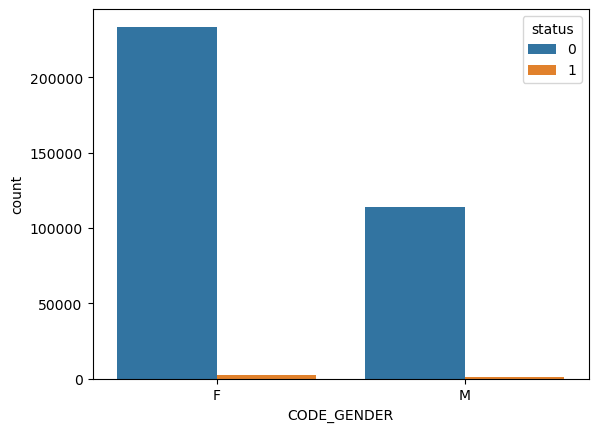

In [14]:
proportion_code_gender, crosstab_code_gender, fig_code_gender = cat_EDA(data_train, 'CODE_GENDER')

In [15]:
# Proportion

proportion_code_gender

F    0.671661
M    0.328339
Name: CODE_GENDER, dtype: float64

In [16]:
# Calculate odds

crosstab_code_gender

status,0,1,Odds
CODE_GENDER,,,
F,233508,2141,0.01
M,114018,1178,0.01


## Own Car

In [17]:
data_train['FLAG_OWN_CAR'].value_counts()

N    220518
Y    130327
Name: FLAG_OWN_CAR, dtype: int64

In [18]:
# Convert value into 1 and 0

data_train.loc[data_train['FLAG_OWN_CAR'] == "Y", 'FLAG_OWN_CAR'] = 1
data_train.loc[data_train['FLAG_OWN_CAR'] == "N", 'FLAG_OWN_CAR'] = 0

In [19]:
data_train['FLAG_OWN_CAR'].value_counts()

0    220518
1    130327
Name: FLAG_OWN_CAR, dtype: int64

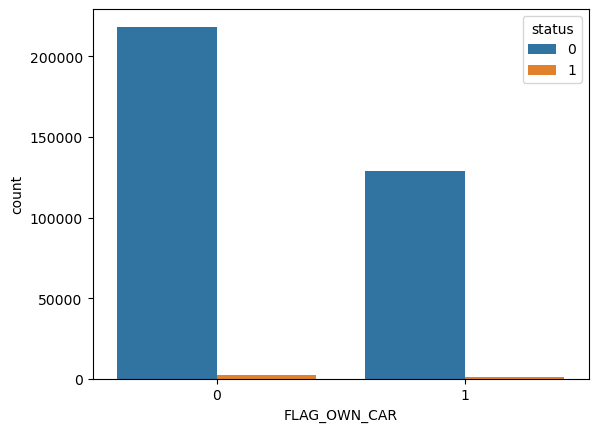

In [20]:
proportion_own_car, crosstab_own_car, fig_own_car = cat_EDA(data_train, 'FLAG_OWN_CAR')

In [21]:
# Proportion

proportion_own_car

0    0.628534
1    0.371466
Name: FLAG_OWN_CAR, dtype: float64

In [22]:
# Calculate odds

crosstab_own_car

status,0,1,Odds
FLAG_OWN_CAR,,,
0,218399,2119,0.01
1,129127,1200,0.01


## Own Realty

In [23]:
data_train['FLAG_OWN_REALTY'].value_counts()

Y    243406
N    107439
Name: FLAG_OWN_REALTY, dtype: int64

In [24]:
# Convert value into 1 and 0

data_train.loc[data_train['FLAG_OWN_REALTY'] == "Y", 'FLAG_OWN_REALTY'] = 1
data_train.loc[data_train['FLAG_OWN_REALTY'] == "N", 'FLAG_OWN_REALTY'] = 0

In [25]:
data_train['FLAG_OWN_REALTY'].value_counts()

1    243406
0    107439
Name: FLAG_OWN_REALTY, dtype: int64

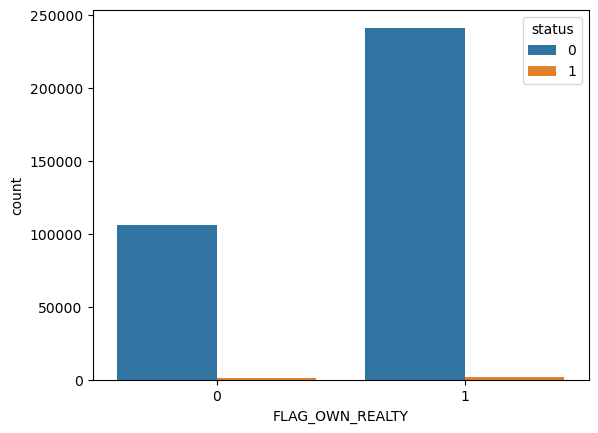

In [26]:
proportion_own_realty, crosstab_own_realty, fig_own_realty = cat_EDA(data_train, 'FLAG_OWN_REALTY')

In [27]:
# Proportion

proportion_own_realty

1    0.693771
0    0.306229
Name: FLAG_OWN_REALTY, dtype: float64

In [28]:
# Calculate odds

crosstab_own_realty

status,0,1,Odds
FLAG_OWN_REALTY,,,
0,106269,1170,0.01
1,241257,2149,0.01


## Count Children

In [29]:
# Descriptive statistics

desc_stat_children, desc_stat_resp_childern = num_EDA_desc(data = data_train, predictor = 'CNT_CHILDREN')

In [30]:
desc_stat_children

count    350845.000000
mean          0.426696
std           0.725125
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [31]:
desc_stat_resp_childern

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,347526.0,0.426357,0.724104,0.0,0.0,0.0,1.0,19.0
1,3319.0,0.462187,0.824395,0.0,0.0,0.0,1.0,14.0


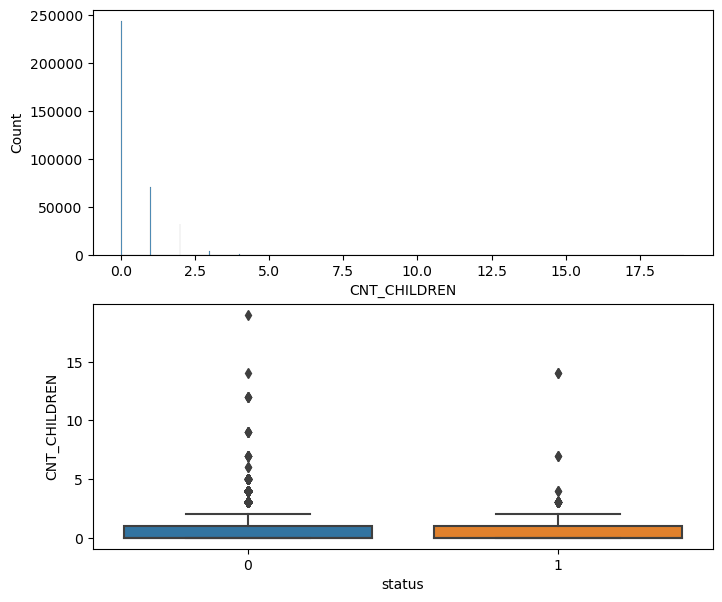

In [32]:
# Graph

num_EDA_graph(data = data_train, predictor = 'CNT_CHILDREN')

## Annual Income Total

In [33]:
# Descriptive statistics

desc_stat_annual_inc, desc_stat_resp_annual_inc = num_EDA_desc(data = data_train, predictor = 'AMT_INCOME_TOTAL')

In [34]:
desc_stat_annual_inc

count    3.508450e+05
mean     1.873871e+05
std      1.109568e+05
min      2.610000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      6.750000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [35]:
desc_stat_resp_annual_inc

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,347526.0,187343.586360,110881.765599,26100.0,121500.0,157500.0,225000.0,6750000.0
1,3319.0,191941.310636,118477.269493,27000.0,121500.0,157500.0,225000.0,1575000.0


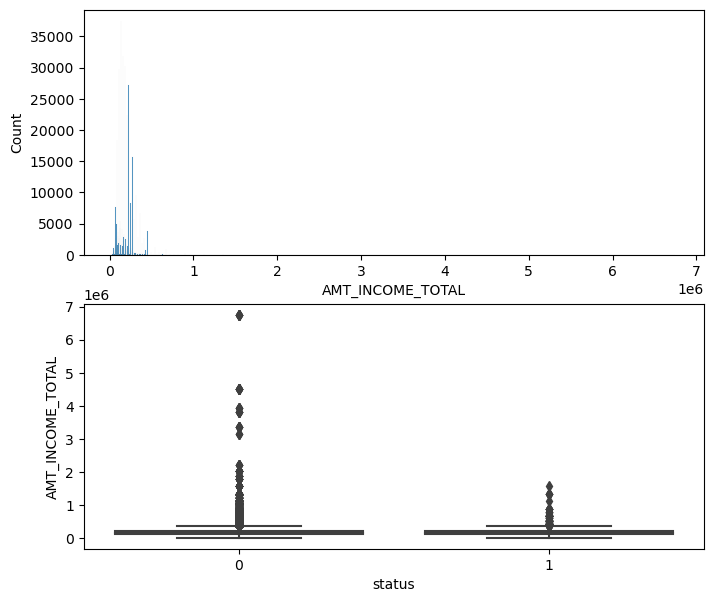

In [36]:
# Graph

num_EDA_graph(data = data_train, predictor = 'AMT_INCOME_TOTAL')

## Income Type

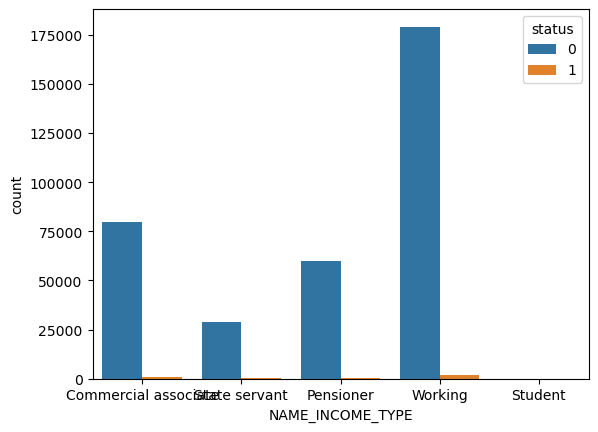

In [37]:
proportion_income_type, crosstab_income_type, fig_income_type = cat_EDA(data_train, 'NAME_INCOME_TYPE')

In [38]:
# Proportion

proportion_income_type

Working                 0.515316
Commercial associate    0.229013
Pensioner               0.172760
State servant           0.082877
Student                 0.000034
Name: NAME_INCOME_TYPE, dtype: float64

In [39]:
# Calculate odds

crosstab_income_type

status,0,1,Odds
NAME_INCOME_TYPE,,,
Student,11,1,0.09
Commercial associate,79512,836,0.01
Pensioner,60121,491,0.01
State servant,28772,305,0.01
Working,179110,1686,0.01


## Education Type

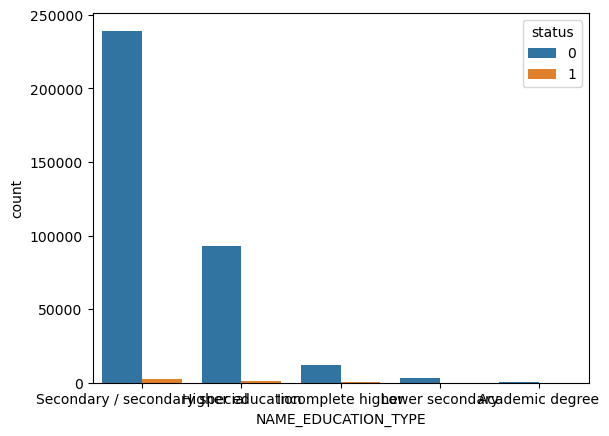

In [40]:
proportion_education_type, crosstab_education_type, fig_education_type = cat_EDA(data_train, 'NAME_EDUCATION_TYPE')

In [41]:
# Proportion

proportion_education_type

Secondary / secondary special    0.688324
Higher education                 0.267731
Incomplete higher                0.033955
Lower secondary                  0.009298
Academic degree                  0.000693
Name: NAME_EDUCATION_TYPE, dtype: float64

In [42]:
# Calculate odds

crosstab_education_type

status,0,1,Odds
NAME_EDUCATION_TYPE,,,
Academic degree,239,4,0.02
Higher education,93063,869,0.01
Incomplete higher,11745,168,0.01
Lower secondary,3229,33,0.01
Secondary / secondary special,239250,2245,0.01


## Family Status

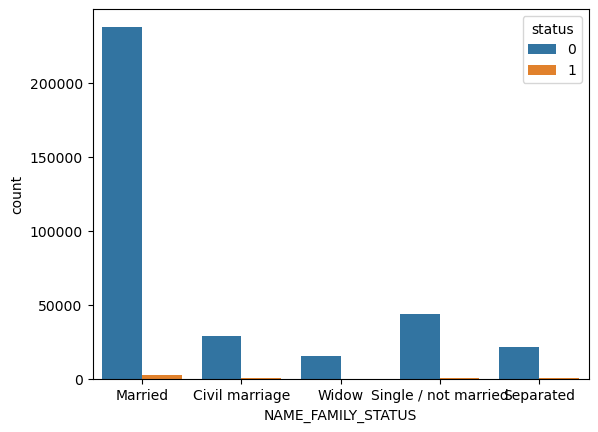

In [43]:
proportion_famiy_status, crosstab_famiy_status, fig_famiy_status = cat_EDA(data_train, 'NAME_FAMILY_STATUS')

In [44]:
# Proportion

proportion_famiy_status

Married                 0.683929
Single / not married    0.125719
Civil marriage          0.083384
Separated               0.061968
Widow                   0.045000
Name: NAME_FAMILY_STATUS, dtype: float64

In [45]:
# Calculate odds

crosstab_famiy_status

status,0,1,Odds
NAME_FAMILY_STATUS,,,
Civil marriage,28981,274,0.01
Married,237662,2291,0.01
Separated,21564,177,0.01
Single / not married,43646,462,0.01
Widow,15673,115,0.01


## Housing Type

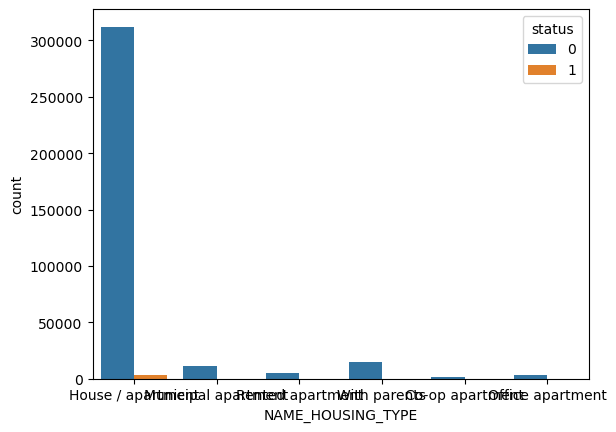

In [46]:
proportion_housing_type, crosstab_housing_type, fig_housing_type = cat_EDA(data_train, 'NAME_HOUSING_TYPE')

In [47]:
# Proportion

proportion_housing_type

House / apartment      0.897955
With parents           0.043760
Municipal apartment    0.032313
Rented apartment       0.013533
Office apartment       0.008953
Co-op apartment        0.003486
Name: NAME_HOUSING_TYPE, dtype: float64

In [48]:
# Odds

crosstab_housing_type

status,0,1,Odds
NAME_HOUSING_TYPE,,,
Co-op apartment,1214,9,0.01
House / apartment,312118,2925,0.01
Municipal apartment,11232,105,0.01
Office apartment,3110,31,0.01
Rented apartment,4687,61,0.01
With parents,15165,188,0.01


## Days Birth

In [49]:
# Descriptive statistics

desc_stat_days_birth, desc_stat_resp_days_birth = num_EDA_desc(data = data_train, predictor = 'DAYS_BIRTH')

In [50]:
desc_stat_days_birth

count    350845.000000
mean      16001.004532
std        4188.741767
min        7489.000000
25%       12510.000000
50%       15629.000000
75%       19492.000000
max       25201.000000
Name: DAYS_BIRTH, dtype: float64

In [51]:
desc_stat_resp_days_birth

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,347526.0,16004.778336,4188.250498,7489.0,12516.0,15634.0,19495.0,25201.0
1,3319.0,15605.856885,4221.872278,7705.0,12003.5,15098.0,18978.0,25099.0


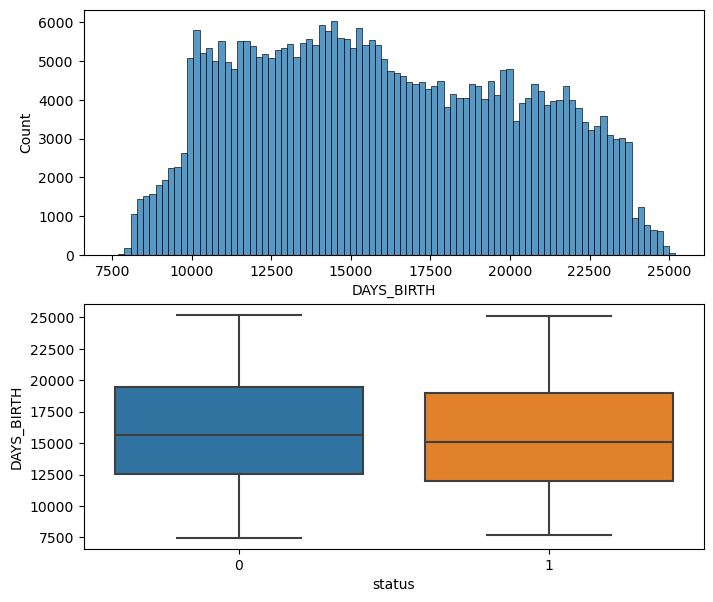

In [52]:
# Graph

num_EDA_graph(data = data_train, predictor = 'DAYS_BIRTH')

In [53]:
# Generate value in age

data_train['DAYS_BIRTH'] = data_train['DAYS_BIRTH']/365

In [54]:
data_train.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status
54587,5169213,F,0,1,0,67500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,46.328767,579,1,0,0,0,Sales staff,2.0,0
305952,6223086,F,1,1,0,135000.0,Commercial associate,Higher education,Civil marriage,House / apartment,48.013699,8332,1,0,0,0,Core staff,2.0,0
152363,5715530,M,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42.030137,2412,1,0,0,0,Managers,2.0,0
105979,5440906,F,0,1,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,35.580822,1313,1,0,0,0,Core staff,3.0,0
5853,6389210,F,0,1,0,360000.0,State servant,Secondary / secondary special,Widow,House / apartment,49.835616,11202,1,0,0,0,Core staff,1.0,0


In [55]:
# Descriptive statistics

desc_stat_days_birth, desc_stat_resp_days_birth = num_EDA_desc(data = data_train, predictor = 'DAYS_BIRTH')

In [56]:
desc_stat_days_birth

count    350845.000000
mean         43.838369
std          11.476005
min          20.517808
25%          34.273973
50%          42.819178
75%          53.402740
max          69.043836
Name: DAYS_BIRTH, dtype: float64

In [57]:
desc_stat_resp_days_birth

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,347526.0,43.848708,11.474659,20.517808,34.290411,42.832877,53.410959,69.043836
1,3319.0,42.755772,11.566773,21.109589,32.886301,41.364384,51.994521,68.764384


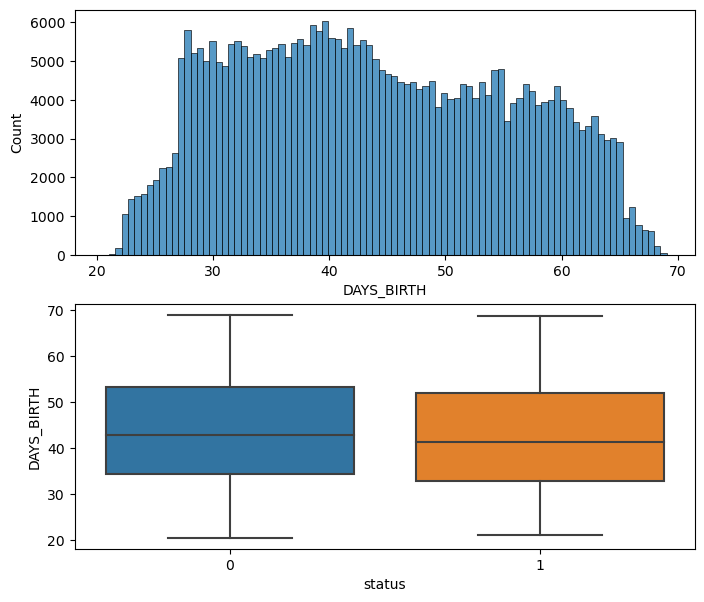

In [58]:
# Graph

num_EDA_graph(data = data_train, predictor = 'DAYS_BIRTH')

In [59]:
data_train.rename(columns={'DAYS_BIRTH':'AGE'}, inplace=True)

## Days Employed

In [60]:
# Descriptive statistics

desc_stat_days_employed, desc_stat_resp_days_employed = num_EDA_desc(data = data_train, predictor = 'DAYS_EMPLOYED')

In [61]:
desc_stat_days_employed

count    350845.000000
mean     -60787.592663
std      138962.853085
min     -365243.000000
25%         369.000000
50%        1466.000000
75%        3101.000000
max       17531.000000
Name: DAYS_EMPLOYED, dtype: float64

In [62]:
desc_stat_resp_days_employed

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,347526.0,-60885.027241,139047.392955,-365243.0,368.0,1464.0,3100.0,17531.0
1,3319.0,-50585.408557,129420.638553,-365243.0,499.5,1562.0,3214.0,14775.0


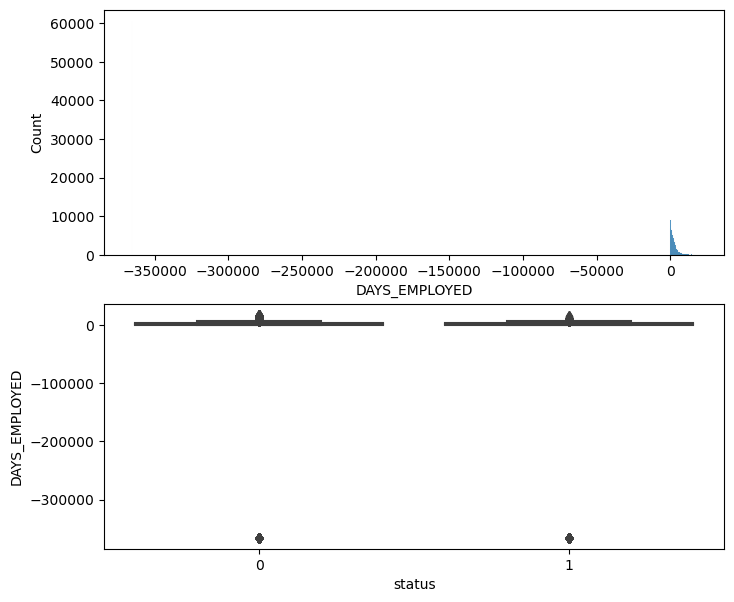

In [63]:
# Graph

num_EDA_graph(data = data_train, predictor = 'DAYS_EMPLOYED')

In [64]:
data_train[data_train['DAYS_EMPLOYED']<1]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status
269537,6088066,F,0,0,0,135000.0,Pensioner,Higher education,Married,House / apartment,56.394521,-365243,1,0,0,0,NaN,2.0,0
211858,5939301,F,0,1,0,121500.0,Pensioner,Secondary / secondary special,Married,House / apartment,63.361644,-365243,1,0,0,0,NaN,2.0,0
192579,5882818,F,1,0,0,247500.0,Pensioner,Higher education,Civil marriage,House / apartment,56.276712,-365243,1,0,0,0,NaN,2.0,0
354788,6471791,F,1,1,0,166500.0,Pensioner,Higher education,Married,House / apartment,55.835616,-365243,1,0,0,0,NaN,2.0,0
388732,6643271,F,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,64.200000,-365243,1,0,1,0,NaN,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173510,5823441,F,0,1,0,153000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,58.161644,-365243,1,0,0,0,NaN,1.0,0
381224,6611232,M,1,1,0,234000.0,Pensioner,Incomplete higher,Married,House / apartment,44.723288,-365243,1,0,0,0,NaN,2.0,0
294924,6158613,M,1,1,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,62.016438,-365243,1,0,0,0,NaN,2.0,0
27098,5089896,F,0,1,0,67500.0,Pensioner,Higher education,Single / not married,Municipal apartment,64.915068,-365243,1,0,0,1,NaN,1.0,0


In [65]:
data_train[data_train['DAYS_EMPLOYED']<1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60477 entries, 269537 to 428391
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   60477 non-null  int64  
 1   CODE_GENDER          60477 non-null  object 
 2   FLAG_OWN_CAR         60477 non-null  object 
 3   FLAG_OWN_REALTY      60477 non-null  object 
 4   CNT_CHILDREN         60477 non-null  int64  
 5   AMT_INCOME_TOTAL     60477 non-null  float64
 6   NAME_INCOME_TYPE     60477 non-null  object 
 7   NAME_EDUCATION_TYPE  60477 non-null  object 
 8   NAME_FAMILY_STATUS   60477 non-null  object 
 9   NAME_HOUSING_TYPE    60477 non-null  object 
 10  AGE                  60477 non-null  float64
 11  DAYS_EMPLOYED        60477 non-null  int64  
 12  FLAG_MOBIL           60477 non-null  int64  
 13  FLAG_WORK_PHONE      60477 non-null  int64  
 14  FLAG_PHONE           60477 non-null  int64  
 15  FLAG_EMAIL           60477 non

There are negative values. Needs further look.

In [66]:
data_train[data_train['DAYS_EMPLOYED']<1]['DAYS_EMPLOYED'].value_counts()

-365243    60477
Name: DAYS_EMPLOYED, dtype: int64

In [67]:
len(data_train['DAYS_EMPLOYED'])

350845

In [68]:
data_train[data_train['DAYS_EMPLOYED']<1]['DAYS_EMPLOYED'].value_counts()/len(data_train['DAYS_EMPLOYED'])

-365243    0.172375
Name: DAYS_EMPLOYED, dtype: float64

In [69]:
data_train[data_train['DAYS_EMPLOYED']<1]['NAME_INCOME_TYPE'].value_counts()

Pensioner    60477
Name: NAME_INCOME_TYPE, dtype: int64

Entries with negative values are entries with NAME_INCOME_TYPE 'Pensioner'

In [70]:
data_train['OCCUPATION_TYPE'].value_counts()

Laborers                 62679
Core staff               34514
Sales staff              32887
Managers                 28408
Drivers                  20747
High skill tech staff    13773
Accountants              12798
Medicine staff           10745
Cooking staff             6413
Security staff            6330
Cleaning staff            4644
Private service staff     2754
Low-skill Laborers        1720
Secretaries               1648
Waiters/barmen staff      1301
Realty agents              824
HR staff                   613
IT staff                   490
Name: OCCUPATION_TYPE, dtype: int64

In [71]:
# Handle errors
data_train.loc[data_train['DAYS_EMPLOYED'] < 1, 'OCCUPATION_TYPE'] = "Pensioner" # There entries are those with 'Pensioner' on NAME_INCOME_TYPE
data_train.loc[data_train['DAYS_EMPLOYED'] < 1, 'DAYS_EMPLOYED'] = np.nan # Impute empty

In [72]:
# Check missing values
data_train['DAYS_EMPLOYED'].isna().sum()

60477

In [73]:
data_train['DAYS_EMPLOYED'] = data_train['DAYS_EMPLOYED']/365

In [74]:
data_train.rename(columns={'DAYS_EMPLOYED':'WORKING_YEARS'}, inplace=True)

## Days Birth and Employed Analysis

In [75]:
data_train.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status
54587,5169213,F,0,1,0,67500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,46.328767,1.586301,1,0,0,0,Sales staff,2.0,0
305952,6223086,F,1,1,0,135000.0,Commercial associate,Higher education,Civil marriage,House / apartment,48.013699,22.827397,1,0,0,0,Core staff,2.0,0
152363,5715530,M,0,1,0,315000.0,Commercial associate,Higher education,Married,House / apartment,42.030137,6.608219,1,0,0,0,Managers,2.0,0
105979,5440906,F,0,1,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,35.580822,3.597260,1,0,0,0,Core staff,3.0,0
5853,6389210,F,0,1,0,360000.0,State servant,Secondary / secondary special,Widow,House / apartment,49.835616,30.690411,1,0,0,0,Core staff,1.0,0


In [76]:
data_train['AGE'].describe()

count    350845.000000
mean         43.838369
std          11.476005
min          20.517808
25%          34.273973
50%          42.819178
75%          53.402740
max          69.043836
Name: AGE, dtype: float64

In [77]:
data_train['WORKING_YEARS'].describe()

count    290368.000000
mean          7.187648
std           6.578758
min           0.032877
25%           2.506849
50%           5.276712
75%           9.619178
max          48.030137
Name: WORKING_YEARS, dtype: float64

In [78]:
data_train[data_train['AGE']<data_train['WORKING_YEARS']]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status


In [79]:
data_train[data_train['AGE']<data_train['WORKING_YEARS']]['WORKING_YEARS'].value_counts()

Series([], Name: WORKING_YEARS, dtype: int64)

In [80]:
data_train[data_train['AGE']<data_train['WORKING_YEARS']]['NAME_INCOME_TYPE'].value_counts()

Series([], Name: NAME_INCOME_TYPE, dtype: int64)

## Mobil

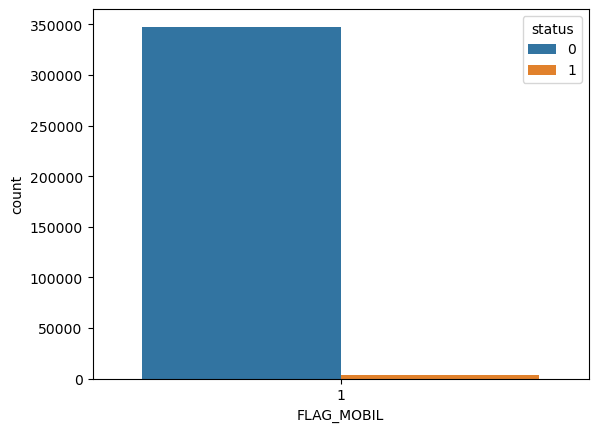

In [81]:
proportion_mobil, crosstab_mobil, fig_mobil = cat_EDA(data_train, 'FLAG_MOBIL')

In [82]:
# Proportion

proportion_mobil

1    1.0
Name: FLAG_MOBIL, dtype: float64

In [83]:
# Odds

crosstab_mobil

status,0,1,Odds
FLAG_MOBIL,,,
1,347526,3319,0.01


## Work Phone

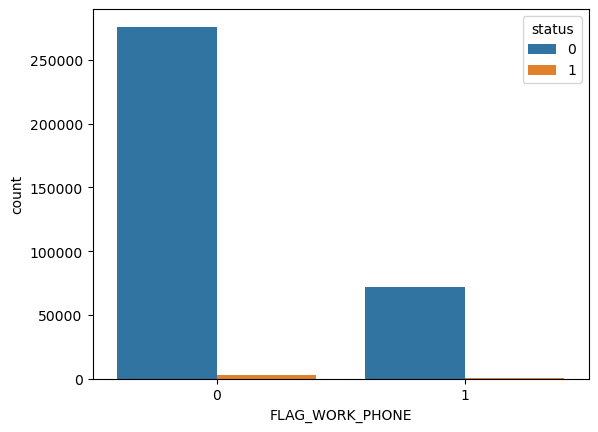

In [84]:
proportion_work_phone, crosstab_work_phone, fig_work_phone = cat_EDA(data_train, 'FLAG_WORK_PHONE')

In [85]:
# Proportion

proportion_work_phone

0    0.79367
1    0.20633
Name: FLAG_WORK_PHONE, dtype: float64

In [86]:
# Odds

crosstab_work_phone

status,0,1,Odds
FLAG_WORK_PHONE,,,
0,275914,2541,0.01
1,71612,778,0.01


## Phone

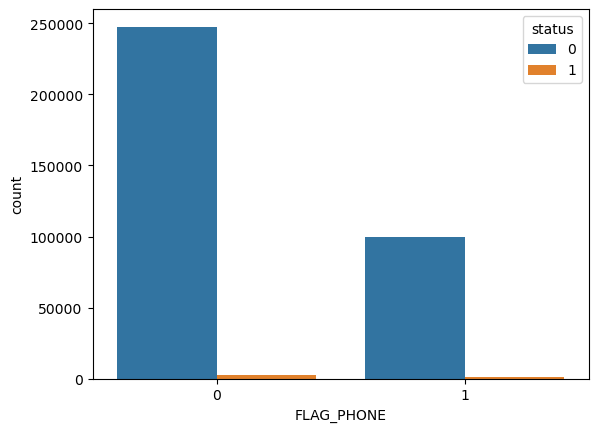

In [87]:
proportion_phone, crosstab_phone, fig_phone = cat_EDA(data_train, 'FLAG_PHONE')

In [88]:
# Proportion

proportion_phone

0    0.71232
1    0.28768
Name: FLAG_PHONE, dtype: float64

In [89]:
# Odds

crosstab_phone

status,0,1,Odds
FLAG_PHONE,,,
0,247560,2354,0.01
1,99966,965,0.01


## Email

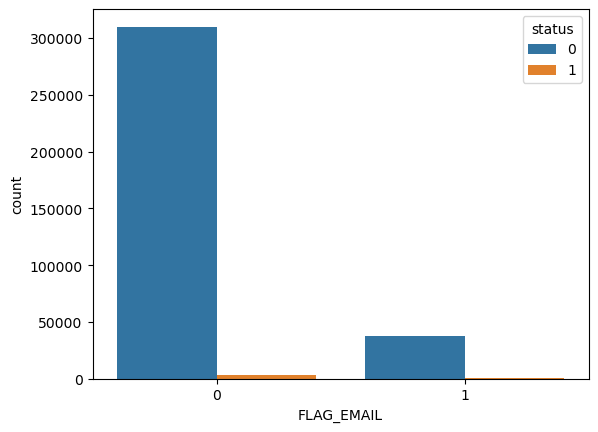

In [90]:
proportion_email, crosstab_email, fig_email = cat_EDA(data_train, 'FLAG_EMAIL')

In [91]:
# Proportion

proportion_email

0    0.891872
1    0.108128
Name: FLAG_EMAIL, dtype: float64

In [92]:
# Odds

proportion_email

0    0.891872
1    0.108128
Name: FLAG_EMAIL, dtype: float64

##  Occupation Type

In [93]:
data_train['OCCUPATION_TYPE'].isna().sum()

47080

In [94]:
data_train[data_train['OCCUPATION_TYPE'].isna()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status
210808,5937922,M,1,1,0,202500.0,Working,Higher education,Single / not married,House / apartment,59.408219,3.542466,1,0,0,0,NaN,1.0,0
382136,6612420,M,1,1,2,315000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,47.441096,4.553425,1,0,0,0,NaN,4.0,0
401705,6727913,M,1,0,2,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,31.956164,1.813699,1,0,0,0,NaN,4.0,0
435852,5703450,F,1,1,2,315000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,34.978082,7.947945,1,0,1,0,NaN,4.0,0
246575,6037205,F,1,1,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,28.969863,7.052055,1,0,0,0,NaN,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303047,6209901,F,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,58.186301,2.219178,1,0,1,0,NaN,1.0,0
211621,5939019,F,0,1,0,180000.0,Working,Incomplete higher,Married,House / apartment,46.273973,6.906849,1,0,0,0,NaN,2.0,0
45098,5135760,M,0,1,2,225000.0,State servant,Higher education,Married,House / apartment,35.175342,12.558904,1,0,0,0,NaN,4.0,0
64709,5398813,M,1,0,0,360000.0,State servant,Higher education,Married,House / apartment,42.084932,1.761644,1,0,1,1,NaN,2.0,0


In [95]:
data_train['OCCUPATION_TYPE'] = data_train['OCCUPATION_TYPE'].fillna('Unknown')

In [96]:
data_train['OCCUPATION_TYPE'].isna().sum()

0

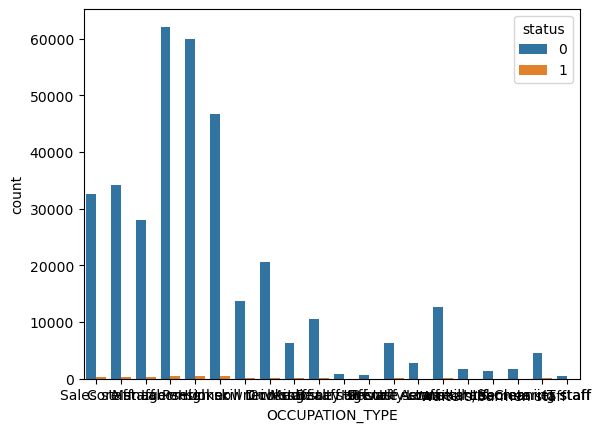

In [97]:
proportion_occupation_type, crosstab_occupation_type, fig_occupation_type = cat_EDA(data_train, 'OCCUPATION_TYPE')

In [98]:
# Proportion

proportion_occupation_type

Laborers                 0.178652
Pensioner                0.172375
Unknown                  0.134190
Core staff               0.098374
Sales staff              0.093737
Managers                 0.080970
Drivers                  0.059134
High skill tech staff    0.039257
Accountants              0.036478
Medicine staff           0.030626
Cooking staff            0.018279
Security staff           0.018042
Cleaning staff           0.013237
Private service staff    0.007850
Low-skill Laborers       0.004902
Secretaries              0.004697
Waiters/barmen staff     0.003708
Realty agents            0.002349
HR staff                 0.001747
IT staff                 0.001397
Name: OCCUPATION_TYPE, dtype: float64

In [99]:
# Odds

crosstab_occupation_type

status,0,1,Odds
OCCUPATION_TYPE,,,
IT staff,480,10,0.02
Low-skill Laborers,1692,28,0.02
Accountants,12686,112,0.01
Medicine staff,10619,126,0.01
Unknown,46635,445,0.01
Security staff,6260,70,0.01
Sales staff,32583,304,0.01
Realty agents,818,6,0.01
Private service staff,2738,16,0.01


## Count Family Members

In [100]:
# Descriptive statistics

desc_stat_family_members, desc_stat_resp_family_members = num_EDA_desc(data = data_train, predictor = 'CNT_FAM_MEMBERS')

In [101]:
desc_stat_family_members

count    350845.000000
mean          2.194100
std           0.896934
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [102]:
desc_stat_resp_family_members

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
0,347526.0,2.193686,0.896153,1.0,2.0,2.0,3.0,20.0
1,3319.0,2.237421,0.974496,1.0,2.0,2.0,3.0,15.0


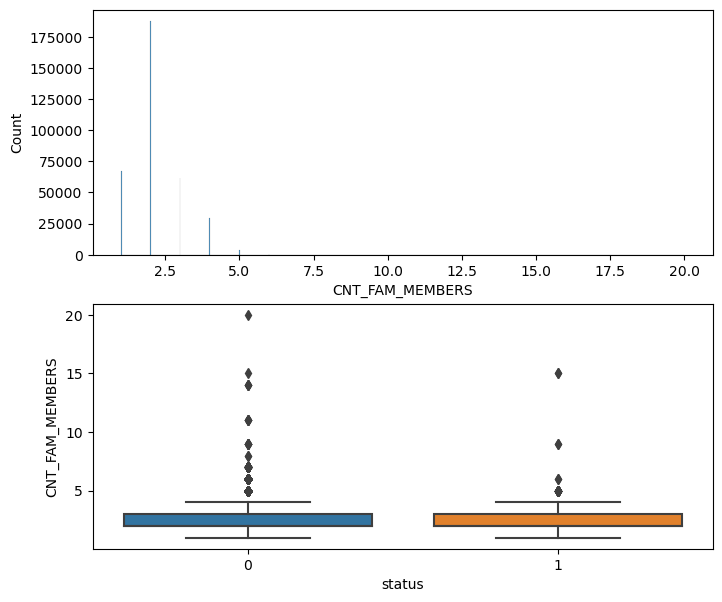

In [103]:
# Graph

num_EDA_graph(data = data_train, predictor = 'CNT_FAM_MEMBERS')

## End of EDA

In [104]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350845 entries, 54587 to 126311
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   350845 non-null  int64  
 1   CODE_GENDER          350845 non-null  object 
 2   FLAG_OWN_CAR         350845 non-null  object 
 3   FLAG_OWN_REALTY      350845 non-null  object 
 4   CNT_CHILDREN         350845 non-null  int64  
 5   AMT_INCOME_TOTAL     350845 non-null  float64
 6   NAME_INCOME_TYPE     350845 non-null  object 
 7   NAME_EDUCATION_TYPE  350845 non-null  object 
 8   NAME_FAMILY_STATUS   350845 non-null  object 
 9   NAME_HOUSING_TYPE    350845 non-null  object 
 10  AGE                  350845 non-null  float64
 11  WORKING_YEARS        290368 non-null  float64
 12  FLAG_MOBIL           350845 non-null  int64  
 13  FLAG_WORK_PHONE      350845 non-null  int64  
 14  FLAG_PHONE           350845 non-null  int64  
 15  FLAG_EMAIL   

In [105]:
# Change all flag-related columns into object type

data_train = data_train.astype({'FLAG_MOBIL':object, 'FLAG_WORK_PHONE':object, 'FLAG_PHONE':object, 'FLAG_EMAIL':object, 'FLAG_EMAIL':object})

In [106]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350845 entries, 54587 to 126311
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   350845 non-null  int64  
 1   CODE_GENDER          350845 non-null  object 
 2   FLAG_OWN_CAR         350845 non-null  object 
 3   FLAG_OWN_REALTY      350845 non-null  object 
 4   CNT_CHILDREN         350845 non-null  int64  
 5   AMT_INCOME_TOTAL     350845 non-null  float64
 6   NAME_INCOME_TYPE     350845 non-null  object 
 7   NAME_EDUCATION_TYPE  350845 non-null  object 
 8   NAME_FAMILY_STATUS   350845 non-null  object 
 9   NAME_HOUSING_TYPE    350845 non-null  object 
 10  AGE                  350845 non-null  float64
 11  WORKING_YEARS        290368 non-null  float64
 12  FLAG_MOBIL           350845 non-null  object 
 13  FLAG_WORK_PHONE      350845 non-null  object 
 14  FLAG_PHONE           350845 non-null  object 
 15  FLAG_EMAIL   

## Binning

In order to simplify our dataset and, more importantly, scaling all numerical variables into same scale with same weight, we do binning.

In [107]:
# Define categorical predictor

cat_var = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
          'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']

In [108]:
# Define numerical predictors

num_var = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'WORKING_YEARS', 'CNT_FAM_MEMBERS']

In [109]:
data_train['CNT_CHILDREN'].value_counts()

0     243419
1      70779
2      31768
3       4360
4        395
5        100
7          9
9          5
12         4
14         3
6          2
19         1
Name: CNT_CHILDREN, dtype: int64

In [110]:
data_train['AMT_INCOME_TOTAL'].value_counts()

135000.0    37364
157500.0    31692
180000.0    30263
112500.0    29780
225000.0    27167
            ...  
170910.0        1
107752.5        1
112950.0        1
32139.0         1
165735.0        1
Name: AMT_INCOME_TOTAL, Length: 839, dtype: int64

In [111]:
data_train['AGE'].value_counts()

32.073973    120
55.087671     94
39.452055     92
38.843836     91
50.915068     90
            ... 
23.457534      1
24.484932      1
44.471233      1
22.608219      1
68.471233      1
Name: AGE, Length: 16312, dtype: int64

In [112]:
data_train['WORKING_YEARS'].value_counts()

0.597260     206
4.597260     201
2.679452     195
1.178082     195
0.490411     193
            ... 
37.427397      1
23.134247      1
29.994521      1
17.630137      1
30.810959      1
Name: WORKING_YEARS, Length: 9318, dtype: int64

In [113]:
data_train['CNT_FAM_MEMBERS'].value_counts()

2.0     187342
1.0      67497
3.0      61695
4.0      29740
5.0       4084
6.0        371
7.0         92
9.0          9
11.0         5
14.0         4
15.0         3
8.0          2
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [114]:
# Create a function for binning the numerical predictor
def create_binning(data, predictor_label, num_of_bins):
    """
    Function for binning numerical predictor.

    Parameters
    ----------
    data : array like
      The name of dataset.

    predictor_label : object
      The label of predictor variable.

    num_of_bins : integer
      The number of bins.


    Return
    ------
    data : array like
      The name of transformed dataset.

    """
    # Create a new column containing the binned predictor
    data[predictor_label + "_bin"] = pd.qcut(data[predictor_label],
                                             q = num_of_bins,
                                            duplicates='drop')

    return data

In [115]:
for column in num_var:
    data_train_binned = create_binning(data = data_train,
                                     predictor_label = column,
                                     num_of_bins = 4)

In [116]:
data_train_binned.T

,54587,305952,152363,105979,5853,388312,269537,211858,303010,192579,...,27098,276375,406446,250364,428391,16004,385669,316546,262746,126311
ID,5169213,6223086,5715530,5440906,6389210,6789900,6088066,5939301,6209805,5882818,...,5089896,6107302,6744192,6050864,7785362,5046022,6625112,6251717,6837406,6172792
CODE_GENDER,F,F,M,F,F,M,F,F,M,F,...,F,F,F,F,F,M,M,M,M,M
FLAG_OWN_CAR,0,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,1,1,1,1
FLAG_OWN_REALTY,1,1,1,1,1,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0
CNT_CHILDREN,0,0,0,1,0,0,0,0,2,0,...,0,3,0,0,0,1,0,0,1,1
AMT_INCOME_TOTAL,67500.0,135000.0,315000.0,135000.0,360000.0,117000.0,135000.0,121500.0,405000.0,247500.0,...,67500.0,202500.0,225000.0,225000.0,225000.0,247500.0,157500.0,180000.0,135000.0,171000.0
NAME_INCOME_TYPE,Commercial associate,Commercial associate,Commercial associate,Commercial associate,State servant,Commercial associate,Pensioner,Pensioner,Commercial associate,Pensioner,...,Pensioner,State servant,Commercial associate,Commercial associate,Pensioner,State servant,Working,Working,Working,State servant
NAME_EDUCATION_TYPE,Secondary / secondary special,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Higher education,Secondary / secondary special,Secondary / secondary special,Higher education,...,Higher education,Secondary / secondary special,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Married,Civil marriage,Married,Married,Widow,Married,Married,Married,Married,Civil marriage,...,Single / not married,Civil marriage,Single / not married,Married,Separated,Married,Married,Married,Married,Married
NAME_HOUSING_TYPE,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,...,Municipal apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,With parents,House / apartment,House / apartment


In [117]:
# Check for missing values

data_train_binned.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
AGE                         0
WORKING_YEARS           60477
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
status                      0
CNT_CHILDREN_bin            0
AMT_INCOME_TOTAL_bin        0
AGE_bin                     0
WORKING_YEARS_bin       60477
CNT_FAM_MEMBERS_bin         0
dtype: int64

In [118]:
# Turning empty values into a distinct category called 'Missing'

data_train_binned['WORKING_YEARS_bin'] = data_train_binned['WORKING_YEARS_bin'].cat.add_categories('Missing')
data_train_binned['WORKING_YEARS_bin'].fillna(value = 'Missing', inplace = True)

In [119]:
# Check for missing values

data_train_binned.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
AGE                         0
WORKING_YEARS           60477
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
status                      0
CNT_CHILDREN_bin            0
AMT_INCOME_TOTAL_bin        0
AGE_bin                     0
WORKING_YEARS_bin           0
CNT_FAM_MEMBERS_bin         0
dtype: int64

In [120]:
# Define the initial empty list
crosstab_num = []

for column in num_var:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column + "_bin"],
                         data_train_binned[response],
                         margins = True)

  # Append to the list
  crosstab_num.append(crosstab)

In [121]:
# Define the initial empty list
crosstab_cat = []

for column in cat_var:

  # Create a contingency table
  crosstab = pd.crosstab(data_train_binned[column],
                         data_train_binned[response],
                         margins = True)

  # Append to the list
  crosstab_cat.append(crosstab)

In [122]:
# Put all two in a crosstab_list
crosstab_list = crosstab_num + crosstab_cat

crosstab_list

[status                 0     1     All
 CNT_CHILDREN_bin                      
 (-0.001, 1.0]     311278  2920  314198
 (1.0, 19.0]        36248   399   36647
 All               347526  3319  350845,
 status                      0     1     All
 AMT_INCOME_TOTAL_bin                       
 (26099.999, 121500.0]   89713   845   90558
 (121500.0, 157500.0]    84110   815   84925
 (157500.0, 225000.0]   100385   918  101303
 (225000.0, 6750000.0]   73318   741   74059
 All                    347526  3319  350845,
 status                 0     1     All
 AGE_bin                               
 (20.517, 34.274]   86736   980   87716
 (34.274, 42.819]   86888   822   87710
 (42.819, 53.403]   86934   789   87723
 (53.403, 69.044]   86968   728   87696
 All               347526  3319  350845,
 status                  0     1     All
 WORKING_YEARS_bin                      
 (0.0319, 2.507]     71971   695   72666
 (2.507, 5.277]      71787   734   72521
 (5.277, 9.619]      71920   711   726

## Weight of Evidence (WOE) and Information Value (IV)

In [123]:
# Define the initial list for WOE
WOE_list = []

# Define the initial list for IV
IV_list = []

# Create the initial table for IV
IV_table = pd.DataFrame({'Characteristic': [],
                         'Information Value' : []})

# Perform the algorithm for all crosstab
for crosstab in crosstab_list:

    # Calculate % Good
    crosstab['p_good'] = crosstab[0]/crosstab[0]['All']

    # Calculate % Bad
    crosstab['p_bad'] = crosstab[1]/crosstab[1]['All']

    # Calculate the WOE
    crosstab['WOE'] = np.log(crosstab['p_good']/crosstab['p_bad'])

    # Calculate the contribution value for IV
    crosstab['contribution'] = (crosstab['p_good']-crosstab['p_bad'])*crosstab['WOE']

    # Calculate the IV
    IV = crosstab['contribution'][:-1].sum()

    add_IV = {'Characteristic': crosstab.index.name, 'Information Value': IV}

    WOE_list.append(crosstab)
    IV_list.append(add_IV)

In [124]:
WOE_list

[status                 0     1     All    p_good     p_bad       WOE  \
 CNT_CHILDREN_bin                                                       
 (-0.001, 1.0]     311278  2920  314198  0.895697  0.879783  0.017927   
 (1.0, 19.0]        36248   399   36647  0.104303  0.120217 -0.141998   
 All               347526  3319  350845  1.000000  1.000000  0.000000   
 
 status            contribution  
 CNT_CHILDREN_bin                
 (-0.001, 1.0]         0.000285  
 (1.0, 19.0]           0.002260  
 All                   0.000000  ,
 status                      0     1     All    p_good     p_bad       WOE  \
 AMT_INCOME_TOTAL_bin                                                        
 (26099.999, 121500.0]   89713   845   90558  0.258148  0.254595  0.013858   
 (121500.0, 157500.0]    84110   815   84925  0.242025  0.245556 -0.014483   
 (157500.0, 225000.0]   100385   918  101303  0.288856  0.276589  0.043395   
 (225000.0, 6750000.0]   73318   741   74059  0.210971  0.223260 -0.0566

In [125]:
# Create initial table to summarize the WOE values
WOE_table = pd.DataFrame({'Characteristic': [],
                          'Attribute': [],
                          'WOE': []})

for i in range(len(crosstab_list)):
    # Define crosstab and reset index
    crosstab = crosstab_list[i].reset_index()
    
    # Save the characteristic name
    char_name = crosstab.columns[0]
    
    # Only use two columns (Attribute name and its WOE value)
    # Drop the last row (average/total WOE)
    crosstab = crosstab.iloc[:-1, [0,-2]]
    crosstab.columns = ['Attribute', 'WOE']
    
    # Add the characteristic name in a column
    crosstab['Characteristic'] = char_name
    
    WOE_table = pd.concat((WOE_table, crosstab),
                        axis = 0)
    
    # Reorder the column
    WOE_table.columns = ['Characteristic',
                       'Attribute',
                       'WOE']
    
WOE_table

,Characteristic,Attribute,WOE
0,CNT_CHILDREN_bin,"(-0.001, 1.0]",0.017927
1,CNT_CHILDREN_bin,"(1.0, 19.0]",-0.141998
0,AMT_INCOME_TOTAL_bin,"(26099.999, 121500.0]",0.013858
1,AMT_INCOME_TOTAL_bin,"(121500.0, 157500.0]",-0.014483
2,AMT_INCOME_TOTAL_bin,"(157500.0, 225000.0]",0.043395
...,...,...,...
15,OCCUPATION_TYPE,Sales staff,0.023342
16,OCCUPATION_TYPE,Secretaries,0.805975
17,OCCUPATION_TYPE,Security staff,-0.157736
18,OCCUPATION_TYPE,Unknown,0.000856


In [126]:
WOE_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Characteristic  72 non-null     object 
 1   Attribute       72 non-null     object 
 2   WOE             72 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.2+ KB


In [127]:
# Put all IV in the table

IV_table = pd.DataFrame(IV_list)
IV_table

,Characteristic,Information Value
0,CNT_CHILDREN_bin,0.002545
1,AMT_INCOME_TOTAL_bin,0.001328
2,AGE_bin,0.012410
3,WORKING_YEARS_bin,0.006305
4,CNT_FAM_MEMBERS_bin,0.003138
5,CODE_GENDER,0.003205
6,FLAG_OWN_CAR,0.000431
7,FLAG_OWN_REALTY,0.009901
8,NAME_INCOME_TYPE,0.007806
9,NAME_EDUCATION_TYPE,0.007476


## Using WOE as Predictor Values

In [128]:
# Function to generate the WOE mapping dictionary
def get_woe_map_dict(WOE_table):

    # Initialize the dictionary
    WOE_map_dict = {}
    WOE_map_dict['Missing'] = {}

    unique_char = set(WOE_table['Characteristic'])
    for char in unique_char:
        # Get the Attribute & WOE info for each characteristics
        current_data = (WOE_table
                            [WOE_table['Characteristic']==char]     # Filter based on characteristic
                            [['Attribute', 'WOE']])                 # Then select the attribute & WOE

        # Get the mapping
        WOE_map_dict[char] = {}
        for idx in current_data.index:
            attribute = current_data.loc[idx, 'Attribute']
            woe = current_data.loc[idx, 'WOE']

            if attribute == 'Missing':
                WOE_map_dict['Missing'][char] = woe
            else:
                WOE_map_dict[char][attribute] = woe
                WOE_map_dict['Missing'][char] = np.nan

    # Validate data
    print('Number of key : ', len(WOE_map_dict.keys()))

    return WOE_map_dict


In [129]:
# Generate the WOE map dictionary
WOE_map_dict = get_woe_map_dict(WOE_table = WOE_table)
WOE_map_dict

Number of key :  18


{'Missing': {'NAME_EDUCATION_TYPE': nan,
  'NAME_INCOME_TYPE': nan,
  'FLAG_OWN_CAR': nan,
  'FLAG_OWN_REALTY': nan,
  'CNT_FAM_MEMBERS_bin': nan,
  'CODE_GENDER': nan,
  'NAME_FAMILY_STATUS': nan,
  'NAME_HOUSING_TYPE': nan,
  'FLAG_WORK_PHONE': nan,
  'FLAG_MOBIL': nan,
  'AGE_bin': nan,
  'FLAG_PHONE': nan,
  'AMT_INCOME_TOTAL_bin': nan,
  'WORKING_YEARS_bin': 0.17708778644025264,
  'FLAG_EMAIL': nan,
  'OCCUPATION_TYPE': nan,
  'CNT_CHILDREN_bin': nan},
 'NAME_EDUCATION_TYPE': {'Academic degree': -0.5610067588003869,
  'Higher education': 0.02251288726791091,
  'Incomplete higher': -0.4039570319222526,
  'Lower secondary': -0.06775574032021171,
  'Secondary / secondary special': 0.017627559526839316},
 'NAME_INCOME_TYPE': {'Commercial associate': -0.09614133004886688,
  'Pensioner': 0.1564943997219168,
  'State servant': -0.10432975523217163,
  'Student': -2.2532806768136364,
  'Working': 0.014465333045496895},
 'FLAG_OWN_CAR': {0: -0.015796563792480182, 1: 0.027298909781266322},
 

In [130]:
# Function to replace the raw data in the train set with WOE values
def transform_woe(raw_data, WOE_dict, num_cols):

    woe_data = raw_data.copy()

    # Map the raw data
    for col in woe_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        woe_data[col] = woe_data[col].map(WOE_map_dict[map_col])

    # Map the raw data if there is a missing value or out of range value
    for col in woe_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        woe_data[col] = woe_data[col].fillna(value=WOE_map_dict['Missing'][map_col])

    return woe_data

In [131]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350845 entries, 54587 to 126311
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID                    350845 non-null  int64   
 1   CODE_GENDER           350845 non-null  object  
 2   FLAG_OWN_CAR          350845 non-null  object  
 3   FLAG_OWN_REALTY       350845 non-null  object  
 4   CNT_CHILDREN          350845 non-null  int64   
 5   AMT_INCOME_TOTAL      350845 non-null  float64 
 6   NAME_INCOME_TYPE      350845 non-null  object  
 7   NAME_EDUCATION_TYPE   350845 non-null  object  
 8   NAME_FAMILY_STATUS    350845 non-null  object  
 9   NAME_HOUSING_TYPE     350845 non-null  object  
 10  AGE                   350845 non-null  float64 
 11  WORKING_YEARS         290368 non-null  float64 
 12  FLAG_MOBIL            350845 non-null  object  
 13  FLAG_WORK_PHONE       350845 non-null  object  
 14  FLAG_PHONE            350845 non

In [132]:
# Transform the X_train
woe_train = transform_woe(raw_data = data_train.drop(['ID', 'status'], axis=1),
                          WOE_dict = WOE_map_dict,
                          num_cols = num_var)

woe_train = woe_train.drop(['CNT_CHILDREN_bin', 'AMT_INCOME_TOTAL_bin', 'AGE_bin', 'WORKING_YEARS_bin', 'CNT_FAM_MEMBERS_bin'], axis=1)
woe_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
54587,0.040767,-0.015797,0.069684,0.017927,0.013858,-0.096141,0.017628,-0.009315,0.018911,0.050962,-0.011069,0.0,0.036356,0.004361,-0.005061,0.023342,0.016371
305952,0.040767,0.027299,0.069684,0.017927,-0.014483,-0.096141,0.022513,0.010092,0.018911,0.050962,-0.018477,0.0,0.036356,0.004361,-0.005061,-0.081662,0.016371
152363,-0.078638,-0.015797,0.069684,0.017927,-0.056615,-0.096141,0.022513,-0.009315,0.018911,0.009459,-0.034539,0.0,0.036356,0.004361,-0.005061,-0.163678,0.016371
105979,0.040767,-0.015797,0.069684,0.017927,-0.014483,-0.096141,0.017628,-0.009315,0.018911,0.009459,-0.068226,0.0,0.036356,0.004361,-0.005061,-0.081662,0.030972
5853,0.040767,-0.015797,0.069684,0.017927,-0.056615,-0.104330,0.017628,0.263587,0.018911,0.050962,-0.018477,0.0,0.036356,0.004361,-0.005061,-0.081662,0.016371


In [133]:
woe_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350845 entries, 54587 to 126311
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          350845 non-null  float64
 1   FLAG_OWN_CAR         350845 non-null  float64
 2   FLAG_OWN_REALTY      350845 non-null  float64
 3   CNT_CHILDREN         350845 non-null  float64
 4   AMT_INCOME_TOTAL     350845 non-null  float64
 5   NAME_INCOME_TYPE     350845 non-null  float64
 6   NAME_EDUCATION_TYPE  350845 non-null  float64
 7   NAME_FAMILY_STATUS   350845 non-null  float64
 8   NAME_HOUSING_TYPE    350845 non-null  float64
 9   AGE                  350845 non-null  float64
 10  WORKING_YEARS        350845 non-null  float64
 11  FLAG_MOBIL           350845 non-null  float64
 12  FLAG_WORK_PHONE      350845 non-null  float64
 13  FLAG_PHONE           350845 non-null  float64
 14  FLAG_EMAIL           350845 non-null  float64
 15  OCCUPATION_TY

In [134]:
# Concatenate woe_train and y_train as data_train_use
data_train_use = pd.concat((woe_train, y_train),
                       axis = 1)

In [135]:
data_train_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350845 entries, 54587 to 126311
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          350845 non-null  float64
 1   FLAG_OWN_CAR         350845 non-null  float64
 2   FLAG_OWN_REALTY      350845 non-null  float64
 3   CNT_CHILDREN         350845 non-null  float64
 4   AMT_INCOME_TOTAL     350845 non-null  float64
 5   NAME_INCOME_TYPE     350845 non-null  float64
 6   NAME_EDUCATION_TYPE  350845 non-null  float64
 7   NAME_FAMILY_STATUS   350845 non-null  float64
 8   NAME_HOUSING_TYPE    350845 non-null  float64
 9   AGE                  350845 non-null  float64
 10  WORKING_YEARS        350845 non-null  float64
 11  FLAG_MOBIL           350845 non-null  float64
 12  FLAG_WORK_PHONE      350845 non-null  float64
 13  FLAG_PHONE           350845 non-null  float64
 14  FLAG_EMAIL           350845 non-null  float64
 15  OCCUPATION_TY

# Test Data

After doing EDA and cleansing on train data, we will do the same on test data but using train data characteristic to avoid any data leakage and creating condition as realistic as possibile to field condition.

In [136]:
# Concatenate x_test and y_test as data_test
data_test = pd.concat((x_test, y_test), axis = 1)

In [137]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87712 entries, 159164 to 102978
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87712 non-null  int64  
 1   CODE_GENDER          87712 non-null  object 
 2   FLAG_OWN_CAR         87712 non-null  object 
 3   FLAG_OWN_REALTY      87712 non-null  object 
 4   CNT_CHILDREN         87712 non-null  int64  
 5   AMT_INCOME_TOTAL     87712 non-null  float64
 6   NAME_INCOME_TYPE     87712 non-null  object 
 7   NAME_EDUCATION_TYPE  87712 non-null  object 
 8   NAME_FAMILY_STATUS   87712 non-null  object 
 9   NAME_HOUSING_TYPE    87712 non-null  object 
 10  DAYS_BIRTH           87712 non-null  int64  
 11  DAYS_EMPLOYED        87712 non-null  int64  
 12  FLAG_MOBIL           87712 non-null  int64  
 13  FLAG_WORK_PHONE      87712 non-null  int64  
 14  FLAG_PHONE           87712 non-null  int64  
 15  FLAG_EMAIL           87712 non

In [138]:
data_test.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status
159164,5742246,F,N,N,0,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,18790,3311,1,0,0,0,Medicine staff,1.0,0
43048,5125252,M,Y,N,1,337500.0,State servant,Higher education,Married,House / apartment,12794,3574,1,0,0,0,NaN,3.0,0
369264,6543310,F,N,N,1,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,With parents,16470,144,1,0,0,0,Medicine staff,3.0,0
82601,6100467,F,N,Y,1,103500.0,Working,Secondary / secondary special,Married,House / apartment,17426,2630,1,1,0,0,NaN,3.0,0
29039,5236718,F,N,N,0,139500.0,Working,Higher education,Single / not married,House / apartment,11835,980,1,0,1,0,NaN,1.0,0


## Own Car

In [139]:
# Convert value into 1 and 0

data_test.loc[data_test['FLAG_OWN_CAR'] == "Y", 'FLAG_OWN_CAR'] = 1
data_test.loc[data_test['FLAG_OWN_CAR'] == "N", 'FLAG_OWN_CAR'] = 0

## Own Realty

In [140]:
# Convert value into 1 and 0

data_test.loc[data_test['FLAG_OWN_REALTY'] == "Y", 'FLAG_OWN_REALTY'] = 1
data_test.loc[data_test['FLAG_OWN_REALTY'] == "N", 'FLAG_OWN_REALTY'] = 0

## Days Birth

In [141]:
data_test['DAYS_BIRTH'] = data_test['DAYS_BIRTH']/365
data_test.rename(columns={'DAYS_BIRTH':'AGE'}, inplace=True)

In [142]:
data_test.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status
159164,5742246,F,0,0,0,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,51.479452,3311,1,0,0,0,Medicine staff,1.0,0
43048,5125252,M,1,0,1,337500.0,State servant,Higher education,Married,House / apartment,35.052055,3574,1,0,0,0,NaN,3.0,0
369264,6543310,F,0,0,1,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,With parents,45.123288,144,1,0,0,0,Medicine staff,3.0,0
82601,6100467,F,0,1,1,103500.0,Working,Secondary / secondary special,Married,House / apartment,47.742466,2630,1,1,0,0,NaN,3.0,0
29039,5236718,F,0,0,0,139500.0,Working,Higher education,Single / not married,House / apartment,32.424658,980,1,0,1,0,NaN,1.0,0


In [143]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87712 entries, 159164 to 102978
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87712 non-null  int64  
 1   CODE_GENDER          87712 non-null  object 
 2   FLAG_OWN_CAR         87712 non-null  object 
 3   FLAG_OWN_REALTY      87712 non-null  object 
 4   CNT_CHILDREN         87712 non-null  int64  
 5   AMT_INCOME_TOTAL     87712 non-null  float64
 6   NAME_INCOME_TYPE     87712 non-null  object 
 7   NAME_EDUCATION_TYPE  87712 non-null  object 
 8   NAME_FAMILY_STATUS   87712 non-null  object 
 9   NAME_HOUSING_TYPE    87712 non-null  object 
 10  AGE                  87712 non-null  float64
 11  DAYS_EMPLOYED        87712 non-null  int64  
 12  FLAG_MOBIL           87712 non-null  int64  
 13  FLAG_WORK_PHONE      87712 non-null  int64  
 14  FLAG_PHONE           87712 non-null  int64  
 15  FLAG_EMAIL           87712 non

## Days Employed

In [144]:
data_test[data_test['DAYS_EMPLOYED']<1]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status
307299,6228761,M,1,1,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,62.808219,-365243,1,0,0,0,NaN,2.0,0
411419,6780595,F,0,1,0,135000.0,Pensioner,Higher education,Married,House / apartment,54.594521,-365243,1,0,0,0,NaN,2.0,0
56962,5178325,F,0,0,0,175500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,57.654795,-365243,1,0,0,0,NaN,1.0,0
259654,6470100,F,1,0,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,56.169863,-365243,1,0,1,0,NaN,2.0,0
190639,5873230,F,0,1,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,60.619178,-365243,1,0,0,0,NaN,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417220,6815433,F,0,1,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,59.490411,-365243,1,0,0,0,NaN,1.0,0
50915,5156112,M,0,1,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.920548,-365243,1,0,0,0,NaN,2.0,0
169312,5796449,F,0,1,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,55.958904,-365243,1,0,0,0,NaN,2.0,0
375966,6590680,F,0,1,0,72000.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,64.197260,-365243,1,0,0,0,NaN,2.0,0


In [145]:
data_test[data_test['DAYS_EMPLOYED']<1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14852 entries, 307299 to 392710
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14852 non-null  int64  
 1   CODE_GENDER          14852 non-null  object 
 2   FLAG_OWN_CAR         14852 non-null  object 
 3   FLAG_OWN_REALTY      14852 non-null  object 
 4   CNT_CHILDREN         14852 non-null  int64  
 5   AMT_INCOME_TOTAL     14852 non-null  float64
 6   NAME_INCOME_TYPE     14852 non-null  object 
 7   NAME_EDUCATION_TYPE  14852 non-null  object 
 8   NAME_FAMILY_STATUS   14852 non-null  object 
 9   NAME_HOUSING_TYPE    14852 non-null  object 
 10  AGE                  14852 non-null  float64
 11  DAYS_EMPLOYED        14852 non-null  int64  
 12  FLAG_MOBIL           14852 non-null  int64  
 13  FLAG_WORK_PHONE      14852 non-null  int64  
 14  FLAG_PHONE           14852 non-null  int64  
 15  FLAG_EMAIL           14852 non

In [146]:
data_test[data_test['DAYS_EMPLOYED']<1]['DAYS_EMPLOYED'].value_counts()

-365243    14852
Name: DAYS_EMPLOYED, dtype: int64

In [147]:
len(data_test['DAYS_EMPLOYED'])

87712

In [148]:
data_test[data_test['DAYS_EMPLOYED']<1]['NAME_INCOME_TYPE'].value_counts()

Pensioner    14852
Name: NAME_INCOME_TYPE, dtype: int64

In [149]:
data_test['OCCUPATION_TYPE'].value_counts()

Laborers                 15561
Core staff                8493
Sales staff               8211
Managers                  7079
Drivers                   5343
High skill tech staff     3516
Accountants               3187
Medicine staff            2775
Cooking staff             1663
Security staff            1663
Cleaning staff            1201
Private service staff      702
Low-skill Laborers         420
Secretaries                396
Waiters/barmen staff       364
Realty agents              217
HR staff                   161
IT staff                   114
Name: OCCUPATION_TYPE, dtype: int64

In [150]:
# Handle errors

data_test.loc[data_test['DAYS_EMPLOYED'] < 1, 'OCCUPATION_TYPE'] = "Pensioner"
data_test.loc[data_test['DAYS_EMPLOYED'] < 1, 'DAYS_EMPLOYED'] = np.nan

In [151]:
# Check missing values

data_test['DAYS_EMPLOYED'].isna().sum()

14852

In [152]:
# Convert into years

data_test['DAYS_EMPLOYED'] = data_test['DAYS_EMPLOYED']/365

In [153]:
# Change column name

data_test.rename(columns={'DAYS_EMPLOYED':'WORKING_YEARS'}, inplace=True)

In [154]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87712 entries, 159164 to 102978
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87712 non-null  int64  
 1   CODE_GENDER          87712 non-null  object 
 2   FLAG_OWN_CAR         87712 non-null  object 
 3   FLAG_OWN_REALTY      87712 non-null  object 
 4   CNT_CHILDREN         87712 non-null  int64  
 5   AMT_INCOME_TOTAL     87712 non-null  float64
 6   NAME_INCOME_TYPE     87712 non-null  object 
 7   NAME_EDUCATION_TYPE  87712 non-null  object 
 8   NAME_FAMILY_STATUS   87712 non-null  object 
 9   NAME_HOUSING_TYPE    87712 non-null  object 
 10  AGE                  87712 non-null  float64
 11  WORKING_YEARS        72860 non-null  float64
 12  FLAG_MOBIL           87712 non-null  int64  
 13  FLAG_WORK_PHONE      87712 non-null  int64  
 14  FLAG_PHONE           87712 non-null  int64  
 15  FLAG_EMAIL           87712 non

## Days Birth and Employed Analysis

In [155]:
data_test[data_test['AGE']<data_test['WORKING_YEARS']]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status


In [156]:
data_test[data_test['AGE']<data_test['WORKING_YEARS']]['WORKING_YEARS'].value_counts()

Series([], Name: WORKING_YEARS, dtype: int64)

In [157]:
data_test[data_test['AGE']<data_test['WORKING_YEARS']]['NAME_INCOME_TYPE'].value_counts()

Series([], Name: NAME_INCOME_TYPE, dtype: int64)

## Occupation Type

In [158]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87712 entries, 159164 to 102978
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87712 non-null  int64  
 1   CODE_GENDER          87712 non-null  object 
 2   FLAG_OWN_CAR         87712 non-null  object 
 3   FLAG_OWN_REALTY      87712 non-null  object 
 4   CNT_CHILDREN         87712 non-null  int64  
 5   AMT_INCOME_TOTAL     87712 non-null  float64
 6   NAME_INCOME_TYPE     87712 non-null  object 
 7   NAME_EDUCATION_TYPE  87712 non-null  object 
 8   NAME_FAMILY_STATUS   87712 non-null  object 
 9   NAME_HOUSING_TYPE    87712 non-null  object 
 10  AGE                  87712 non-null  float64
 11  WORKING_YEARS        72860 non-null  float64
 12  FLAG_MOBIL           87712 non-null  int64  
 13  FLAG_WORK_PHONE      87712 non-null  int64  
 14  FLAG_PHONE           87712 non-null  int64  
 15  FLAG_EMAIL           87712 non

In [159]:
data_test['OCCUPATION_TYPE'].isna().sum()

11794

In [160]:
data_test[data_test['OCCUPATION_TYPE'].isna()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status
43048,5125252,M,1,0,1,337500.0,State servant,Higher education,Married,House / apartment,35.052055,9.791781,1,0,0,0,NaN,3.0,0
82601,6100467,F,0,1,1,103500.0,Working,Secondary / secondary special,Married,House / apartment,47.742466,7.205479,1,1,0,0,NaN,3.0,0
29039,5236718,F,0,0,0,139500.0,Working,Higher education,Single / not married,House / apartment,32.424658,2.684932,1,0,1,0,NaN,1.0,0
194000,5884950,F,0,0,1,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,27.890411,1.926027,1,0,0,0,NaN,2.0,0
253771,6060192,M,0,0,0,243000.0,State servant,Higher education,Separated,House / apartment,47.139726,0.698630,1,0,0,0,NaN,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,5148482,F,0,1,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,46.334247,17.805479,1,0,0,0,NaN,2.0,0
417897,6829393,M,1,1,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,43.484932,19.917808,1,0,0,0,NaN,3.0,0
121803,5548602,F,0,1,0,202500.0,Working,Higher education,Married,House / apartment,46.109589,3.358904,1,0,0,0,NaN,2.0,0
306200,6223390,F,0,1,0,450000.0,Working,Incomplete higher,Separated,House / apartment,52.112329,17.572603,1,0,1,0,NaN,1.0,0


In [161]:
data_test['OCCUPATION_TYPE'] = data_test['OCCUPATION_TYPE'].fillna('Unknown')

In [162]:
data_test['OCCUPATION_TYPE'].isna().sum()

0

## End of EDA

In [163]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87712 entries, 159164 to 102978
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87712 non-null  int64  
 1   CODE_GENDER          87712 non-null  object 
 2   FLAG_OWN_CAR         87712 non-null  object 
 3   FLAG_OWN_REALTY      87712 non-null  object 
 4   CNT_CHILDREN         87712 non-null  int64  
 5   AMT_INCOME_TOTAL     87712 non-null  float64
 6   NAME_INCOME_TYPE     87712 non-null  object 
 7   NAME_EDUCATION_TYPE  87712 non-null  object 
 8   NAME_FAMILY_STATUS   87712 non-null  object 
 9   NAME_HOUSING_TYPE    87712 non-null  object 
 10  AGE                  87712 non-null  float64
 11  WORKING_YEARS        72860 non-null  float64
 12  FLAG_MOBIL           87712 non-null  int64  
 13  FLAG_WORK_PHONE      87712 non-null  int64  
 14  FLAG_PHONE           87712 non-null  int64  
 15  FLAG_EMAIL           87712 non

In [164]:
# Change all flag-related columns into object type

data_test = data_test.astype({'FLAG_MOBIL':object, 'FLAG_WORK_PHONE':object, 'FLAG_PHONE':object, 'FLAG_EMAIL':object, 'FLAG_EMAIL':object})

In [165]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87712 entries, 159164 to 102978
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87712 non-null  int64  
 1   CODE_GENDER          87712 non-null  object 
 2   FLAG_OWN_CAR         87712 non-null  object 
 3   FLAG_OWN_REALTY      87712 non-null  object 
 4   CNT_CHILDREN         87712 non-null  int64  
 5   AMT_INCOME_TOTAL     87712 non-null  float64
 6   NAME_INCOME_TYPE     87712 non-null  object 
 7   NAME_EDUCATION_TYPE  87712 non-null  object 
 8   NAME_FAMILY_STATUS   87712 non-null  object 
 9   NAME_HOUSING_TYPE    87712 non-null  object 
 10  AGE                  87712 non-null  float64
 11  WORKING_YEARS        72860 non-null  float64
 12  FLAG_MOBIL           87712 non-null  object 
 13  FLAG_WORK_PHONE      87712 non-null  object 
 14  FLAG_PHONE           87712 non-null  object 
 15  FLAG_EMAIL           87712 non

## Binning

In order to simplify our dataset and, more importantly, scaling all numerical variables into same scale with same weight, we do binning.

In [166]:
for column in num_var:
    data_test_binned = create_binning(data = data_test,
                                    predictor_label = column,
                                    num_of_bins = 4)

In [167]:
data_test_binned.T

,159164,43048,369264,82601,29039,335544,427391,260377,214508,416783,...,265595,178554,241824,121803,306200,175834,42471,365365,252443,102978
ID,5742246,5125252,6543310,6100467,5236718,6368899,7410469,6210019,5948928,6806778,...,6077879,5833457,6023139,5548602,6223390,5824642,5117945,6520162,6053853,5427791
CODE_GENDER,F,M,F,F,F,F,F,F,F,M,...,F,F,F,F,F,M,M,M,F,M
FLAG_OWN_CAR,0,1,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
FLAG_OWN_REALTY,0,0,0,1,0,1,0,1,1,0,...,1,1,1,1,1,1,0,1,1,0
CNT_CHILDREN,0,1,1,1,0,2,0,1,2,0,...,1,0,0,0,0,0,2,1,1,1
AMT_INCOME_TOTAL,270000.0,337500.0,135000.0,103500.0,139500.0,90000.0,81000.0,310500.0,274500.0,135000.0,...,135000.0,225000.0,180000.0,202500.0,450000.0,180000.0,135000.0,315000.0,135000.0,225000.0
NAME_INCOME_TYPE,Working,State servant,Commercial associate,Working,Working,Working,Working,Working,Working,Commercial associate,...,Working,Commercial associate,Commercial associate,Working,Working,Working,Commercial associate,Working,State servant,Commercial associate
NAME_EDUCATION_TYPE,Secondary / secondary special,Higher education,Secondary / secondary special,Secondary / secondary special,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Higher education,Secondary / secondary special,...,Secondary / secondary special,Higher education,Secondary / secondary special,Higher education,Incomplete higher,Secondary / secondary special,Secondary / secondary special,Higher education,Higher education,Secondary / secondary special
NAME_FAMILY_STATUS,Single / not married,Married,Civil marriage,Married,Single / not married,Married,Married,Married,Married,Single / not married,...,Single / not married,Married,Married,Married,Separated,Married,Married,Married,Married,Married
NAME_HOUSING_TYPE,House / apartment,House / apartment,With parents,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,With parents,...,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,House / apartment,Office apartment,House / apartment,House / apartment,House / apartment


In [168]:
# Check for missing values

data_test_binned.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
AGE                         0
WORKING_YEARS           14852
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
status                      0
CNT_CHILDREN_bin            0
AMT_INCOME_TOTAL_bin        0
AGE_bin                     0
WORKING_YEARS_bin       14852
CNT_FAM_MEMBERS_bin         0
dtype: int64

In [169]:
# Turning empty values into a distinct category called 'Missing'

data_test_binned['WORKING_YEARS_bin'] = data_test_binned['WORKING_YEARS_bin'].cat.add_categories('Missing')
data_test_binned['WORKING_YEARS_bin'].fillna(value = 'Missing', inplace = True)

In [170]:
# Check for missing values

data_test_binned.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
AGE                         0
WORKING_YEARS           14852
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE             0
CNT_FAM_MEMBERS             0
status                      0
CNT_CHILDREN_bin            0
AMT_INCOME_TOTAL_bin        0
AGE_bin                     0
WORKING_YEARS_bin           0
CNT_FAM_MEMBERS_bin         0
dtype: int64

In [171]:
data_test.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,status,CNT_CHILDREN_bin,AMT_INCOME_TOTAL_bin,AGE_bin,WORKING_YEARS_bin,CNT_FAM_MEMBERS_bin
159164,5742246,F,0,0,0,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,0,0,Medicine staff,1.0,0,"(-0.001, 1.0]","(225000.0, 4500000.0]","(42.825, 53.258]","(5.259, 9.641]","(0.999, 2.0]"
43048,5125252,M,1,0,1,337500.0,State servant,Higher education,Married,House / apartment,...,0,0,Unknown,3.0,0,"(-0.001, 1.0]","(225000.0, 4500000.0]","(34.304, 42.825]","(9.641, 48.03]","(2.0, 3.0]"
369264,6543310,F,0,0,1,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,With parents,...,0,0,Medicine staff,3.0,0,"(-0.001, 1.0]","(121500.0, 162000.0]","(42.825, 53.258]","(0.0319, 2.507]","(2.0, 3.0]"
82601,6100467,F,0,1,1,103500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,Unknown,3.0,0,"(-0.001, 1.0]","(26999.999, 121500.0]","(42.825, 53.258]","(5.259, 9.641]","(2.0, 3.0]"
29039,5236718,F,0,0,0,139500.0,Working,Higher education,Single / not married,House / apartment,...,1,0,Unknown,1.0,0,"(-0.001, 1.0]","(121500.0, 162000.0]","(21.035, 34.304]","(2.507, 5.259]","(0.999, 2.0]"


In [172]:
# Transform the X_train
woe_test = transform_woe(raw_data = data_test.drop(['ID', 'status'], axis=1),
                          WOE_dict = WOE_map_dict,
                          num_cols = num_var)
woe_test = woe_test.drop(['CNT_CHILDREN_bin', 'AMT_INCOME_TOTAL_bin', 'AGE_bin', 'WORKING_YEARS_bin', 'CNT_FAM_MEMBERS_bin'], axis=1)
woe_test.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
159164,0.040767,-0.015797,-0.142206,0.017927,-0.056615,0.014465,0.017628,-0.102874,0.018911,0.050962,-0.034539,0.0,0.036356,0.004361,-0.005061,-0.217058,0.016371
43048,-0.078638,0.027299,-0.142206,0.017927,-0.056615,-0.104330,0.022513,-0.009315,0.018911,0.009459,-0.018477,0.0,0.036356,0.004361,-0.005061,0.000856,0.030972
369264,0.040767,-0.015797,-0.142206,0.017927,-0.014483,-0.096141,0.017628,0.010092,-0.260872,0.050962,-0.011069,0.0,0.036356,0.004361,-0.005061,-0.217058,0.030972
82601,0.040767,-0.015797,0.069684,0.017927,0.013858,0.014465,0.017628,-0.009315,0.018911,0.050962,-0.034539,0.0,-0.128885,0.004361,-0.005061,0.000856,0.030972
29039,0.040767,-0.015797,-0.142206,0.017927,-0.014483,0.014465,0.022513,-0.102874,0.018911,-0.168104,-0.068226,0.0,0.036356,-0.010719,-0.005061,0.000856,0.016371


In [173]:
woe_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87712 entries, 159164 to 102978
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          87712 non-null  float64
 1   FLAG_OWN_CAR         87712 non-null  float64
 2   FLAG_OWN_REALTY      87712 non-null  float64
 3   CNT_CHILDREN         87712 non-null  float64
 4   AMT_INCOME_TOTAL     87712 non-null  float64
 5   NAME_INCOME_TYPE     87712 non-null  float64
 6   NAME_EDUCATION_TYPE  87712 non-null  float64
 7   NAME_FAMILY_STATUS   87712 non-null  float64
 8   NAME_HOUSING_TYPE    87712 non-null  float64
 9   AGE                  87712 non-null  float64
 10  WORKING_YEARS        87712 non-null  float64
 11  FLAG_MOBIL           87712 non-null  float64
 12  FLAG_WORK_PHONE      87712 non-null  float64
 13  FLAG_PHONE           87712 non-null  float64
 14  FLAG_EMAIL           87712 non-null  float64
 15  OCCUPATION_TYPE      87712 non

In [174]:
# Concatenate woe_test and y_test as data_train_use
data_test_use = pd.concat((woe_test, y_test),
                       axis = 1)

In [175]:
data_test_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87712 entries, 159164 to 102978
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          87712 non-null  float64
 1   FLAG_OWN_CAR         87712 non-null  float64
 2   FLAG_OWN_REALTY      87712 non-null  float64
 3   CNT_CHILDREN         87712 non-null  float64
 4   AMT_INCOME_TOTAL     87712 non-null  float64
 5   NAME_INCOME_TYPE     87712 non-null  float64
 6   NAME_EDUCATION_TYPE  87712 non-null  float64
 7   NAME_FAMILY_STATUS   87712 non-null  float64
 8   NAME_HOUSING_TYPE    87712 non-null  float64
 9   AGE                  87712 non-null  float64
 10  WORKING_YEARS        87712 non-null  float64
 11  FLAG_MOBIL           87712 non-null  float64
 12  FLAG_WORK_PHONE      87712 non-null  float64
 13  FLAG_PHONE           87712 non-null  float64
 14  FLAG_EMAIL           87712 non-null  float64
 15  OCCUPATION_TYPE      87712 non

# Exporting Data

In [176]:
# Export into csv file to use later

WOE_table.to_csv('../dataset/WOE_table_new.csv')
woe_train.to_csv('../dataset/woe_train.csv')
woe_test.to_csv('../dataset/woe_test.csv')
data_train_use.to_csv('../dataset/data_train_use_new.csv')
data_test_use.to_csv('../dataset/data_test_use_new.csv')

# Scaling Data

In [177]:
scaler_x_train = preprocessing.StandardScaler().fit(woe_train)

In [178]:
scaler_x_train.mean_

array([1.56206592e-03, 2.11940773e-04, 4.79718999e-03, 1.22213579e-03,
       6.50279330e-04, 3.74898790e-03, 3.42591180e-03, 2.78421386e-03,
       2.56772282e-03, 6.03390094e-03, 3.16438892e-03, 0.00000000e+00,
       2.26150672e-03, 2.29050462e-05, 1.06748622e-04, 9.52953046e-03,
       1.50248940e-03])

In [179]:
scaler_x_train.scale_

array([0.05607368, 0.02082359, 0.09766576, 0.04891265, 0.03633519,
       0.08670239, 0.07835405, 0.07706182, 0.06959692, 0.10974577,
       0.08186034, 1.        , 0.06686779, 0.00682628, 0.01484063,
       0.14018467, 0.05408435])

In [180]:
x_train_scaled = scaler_x_train.transform(woe_train)
x_train_scaled

array([[ 0.69917501, -0.76876779,  0.66437815, ..., -0.34819036,
         0.09853272,  0.27491551],
       [ 0.69917501,  1.30078291,  0.66437815, ..., -0.34819036,
        -0.65051154,  0.27491551],
       [-1.43025706, -0.76876779,  0.66437815, ..., -0.34819036,
        -1.23556717,  0.27491551],
       ...,
       [-1.43025706,  1.30078291,  0.66437815, ..., -0.34819036,
        -0.65051154,  0.27491551],
       [-1.43025706,  1.30078291,  0.66437815, ..., -0.34819036,
        -0.65051154,  0.54487383],
       [-1.43025706,  1.30078291, -1.50516691, ..., -0.34819036,
        -0.65051154,  0.54487383]])

In [181]:
x_train_scaled.mean(axis=0)

array([-5.73545876e-17,  6.39973505e-18, -2.23585680e-17, -5.28180665e-17,
       -1.12845961e-16, -6.26201924e-17,  6.22961551e-17, -6.23771644e-18,
        8.42496767e-18, -2.43027913e-19, -2.51533890e-17,  0.00000000e+00,
       -7.53791578e-17, -2.12244378e-17, -5.66255038e-17, -6.16480807e-17,
        3.13100962e-17])

In [182]:
x_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [183]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=woe_train.columns)
x_train_scaled

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0.699175,-0.768768,0.664378,0.341521,0.363507,-1.152106,0.181250,-0.157005,0.234826,0.409385,-0.173877,0.0,0.509873,0.635502,-0.34819,0.098533,0.274916
1,0.699175,1.300783,0.664378,0.341521,-0.416500,-1.152106,0.243599,0.094826,0.234826,0.409385,-0.264368,0.0,0.509873,0.635502,-0.34819,-0.650512,0.274916
2,-1.430257,-0.768768,0.664378,0.341521,-1.576032,-1.152106,0.243599,-0.157005,0.234826,0.031208,-0.460578,0.0,0.509873,0.635502,-0.34819,-1.235567,0.274916
3,0.699175,-0.768768,0.664378,0.341521,-0.416500,-1.152106,0.181250,-0.157005,0.234826,0.031208,-0.872103,0.0,0.509873,0.635502,-0.34819,-0.650512,0.544874
4,0.699175,-0.768768,0.664378,0.341521,-1.576032,-1.246549,0.181250,3.384328,0.234826,0.409385,-0.264368,0.0,0.509873,0.635502,-0.34819,-0.650512,0.274916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350840,-1.430257,1.300783,0.664378,0.341521,-1.576032,-1.246549,0.181250,-0.157005,0.234826,-1.586741,-0.264368,0.0,0.509873,0.635502,-0.34819,-1.235567,0.544874
350841,-1.430257,1.300783,0.664378,0.341521,-0.416500,0.123599,0.243599,-0.157005,0.234826,-1.586741,-0.872103,0.0,0.509873,0.635502,-0.34819,-0.381558,0.274916
350842,-1.430257,1.300783,0.664378,0.341521,1.176393,0.123599,0.181250,-0.157005,-3.785228,0.409385,-0.872103,0.0,0.509873,0.635502,-0.34819,-0.650512,0.274916
350843,-1.430257,1.300783,0.664378,0.341521,-0.416500,0.123599,0.181250,-0.157005,0.234826,0.031208,-0.173877,0.0,-1.961274,-1.573559,-0.34819,-0.650512,0.544874


In [184]:
y_train = y_train.ravel()
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Modelling

## Defining Params

Params that will be used for Grid Search.

In [185]:
params = {'C':[0.001, 0.1, 1, 10, 100, 1000]}

## Model 0 (Preliminary)

This model uses no feature selection or, in another word, in its raw form.

In [186]:
model_0 = LogisticRegression(random_state = 42, class_weight = 'balanced').fit(x_train_scaled, y_train)

In [187]:
model_0.predict_proba(x_train_scaled)

array([[0.52503097, 0.47496903],
       [0.52531123, 0.47468877],
       [0.44094796, 0.55905204],
       ...,
       [0.50546735, 0.49453265],
       [0.49696696, 0.50303304],
       [0.44906057, 0.55093943]])

In [188]:
model_0.score(x_train_scaled, y_train)

0.5812196269007681

In [189]:
cv_result_0 = cross_validate(estimator = model_0,
                          X = x_train_scaled,
                          y = y_train,
                          scoring = 'roc_auc',
                          cv = 5)
cv_result_0['test_score']

array([0.56442571, 0.55019014, 0.54950622, 0.56571742, 0.57205361])

In [190]:
cv_mean_score_0 = np.mean(cv_result_0['test_score'])
cv_mean_score_0

0.5603786184010834

In [191]:
# Predict class labels for sample in x_train

y_train_pred_0 = model_0.predict(x_train_scaled)
y_train_pred_0

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [192]:
# Calculate the recall score on the train set
recall_train_0 = recall_score(y_true = y_train,
                            y_pred = y_train_pred_0)

recall_train_0

0.5221452244652004

In [193]:
cm_0 = confusion_matrix(y_train, y_train_pred_0)
cm_0

array([[202185, 145341],
       [  1586,   1733]], dtype=int64)

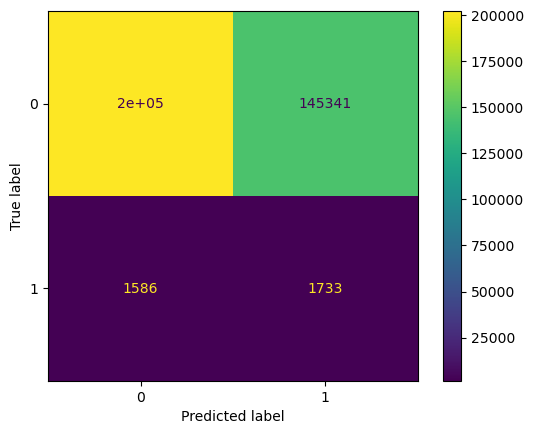

In [194]:
cmd_0 = ConfusionMatrixDisplay(cm_0)
cmd_0.plot()
plt.show()

In [195]:
# Run GridSearch

model_0_gridsearch = GridSearchCV(estimator = LogisticRegression(random_state = 42, class_weight = 'balanced'),
                          param_grid = params,
                          cv = 5,
                          scoring = "roc_auc")

In [196]:
model_0_gridsearch.fit(x_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

In [197]:
# Find the best params

model_0_gridsearch.best_params_

{'C': 1}

In [198]:
# Find the best score

model_0_gridsearch.best_score_

0.5603786184010834

## Model 1 (Forward Selection)

In [199]:
# Define model
model_1 = LogisticRegression(random_state = 42, class_weight = 'balanced')

In [200]:
model_1

LogisticRegression(class_weight='balanced', random_state=42)

In [201]:
sfs1 = sfs(model_1, 
           k_features=(1,17), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(x_train_scaled, y_train)


[2023-11-02 22:36:49] Features: 1/17 -- score: 0.5357939983889982
[2023-11-02 22:37:10] Features: 2/17 -- score: 0.5463633281902529
[2023-11-02 22:37:32] Features: 3/17 -- score: 0.5525782375299851
[2023-11-02 22:37:55] Features: 4/17 -- score: 0.5559829684871408
[2023-11-02 22:38:21] Features: 5/17 -- score: 0.5568612946137002
[2023-11-02 22:38:43] Features: 6/17 -- score: 0.5574442015512359
[2023-11-02 22:39:06] Features: 7/17 -- score: 0.5581668670994527
[2023-11-02 22:39:30] Features: 8/17 -- score: 0.5588536908565508
[2023-11-02 22:39:52] Features: 9/17 -- score: 0.5592562528429816
[2023-11-02 22:40:10] Features: 10/17 -- score: 0.5601394973710683
[2023-11-02 22:40:28] Features: 11/17 -- score: 0.5606649409192269
[2023-11-02 22:40:44] Features: 12/17 -- score: 0.5607889086140335
[2023-11-02 22:40:58] Features: 13/17 -- score: 0.5608786835350477
[2023-11-02 22:41:12] Features: 14/17 -- score: 0.5609119327170746
[2023-11-02 22:41:24] Features: 15/17 -- score: 0.5609119327170746
[20

In [202]:
model_1_features = sfs1.k_feature_idx_
model_1_features

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16)

In [203]:
model_1_features = list(model_1_features)
model_1_features

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16]

In [204]:
x_train_1 = x_train_scaled.iloc[:, model_1_features]
x_train_1

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0.699175,-0.768768,0.664378,0.341521,0.363507,-1.152106,0.181250,-0.157005,0.234826,0.409385,-0.173877,-0.34819,0.098533,0.274916
1,0.699175,1.300783,0.664378,0.341521,-0.416500,-1.152106,0.243599,0.094826,0.234826,0.409385,-0.264368,-0.34819,-0.650512,0.274916
2,-1.430257,-0.768768,0.664378,0.341521,-1.576032,-1.152106,0.243599,-0.157005,0.234826,0.031208,-0.460578,-0.34819,-1.235567,0.274916
3,0.699175,-0.768768,0.664378,0.341521,-0.416500,-1.152106,0.181250,-0.157005,0.234826,0.031208,-0.872103,-0.34819,-0.650512,0.544874
4,0.699175,-0.768768,0.664378,0.341521,-1.576032,-1.246549,0.181250,3.384328,0.234826,0.409385,-0.264368,-0.34819,-0.650512,0.274916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350840,-1.430257,1.300783,0.664378,0.341521,-1.576032,-1.246549,0.181250,-0.157005,0.234826,-1.586741,-0.264368,-0.34819,-1.235567,0.544874
350841,-1.430257,1.300783,0.664378,0.341521,-0.416500,0.123599,0.243599,-0.157005,0.234826,-1.586741,-0.872103,-0.34819,-0.381558,0.274916
350842,-1.430257,1.300783,0.664378,0.341521,1.176393,0.123599,0.181250,-0.157005,-3.785228,0.409385,-0.872103,-0.34819,-0.650512,0.274916
350843,-1.430257,1.300783,0.664378,0.341521,-0.416500,0.123599,0.181250,-0.157005,0.234826,0.031208,-0.173877,-0.34819,-0.650512,0.544874


In [205]:
model_1_a = LogisticRegression(random_state = 42, class_weight = 'balanced').fit(x_train_1, y_train)

In [206]:
model_1_a.predict_proba(x_train_1)

array([[0.52290895, 0.47709105],
       [0.52341052, 0.47658948],
       [0.4382993 , 0.5617007 ],
       ...,
       [0.50195691, 0.49804309],
       [0.51004149, 0.48995851],
       [0.44377842, 0.55622158]])

In [207]:
model_1_a.score(x_train_1, y_train)

0.5779845800852228

In [208]:
cv_result_1 = cross_validate(estimator = model_1_a,
                          X = x_train_1,
                          y = y_train,
                          scoring = 'roc_auc',
                          cv = 5)
cv_result_1['test_score']

array([0.56322494, 0.55354691, 0.54979486, 0.56480014, 0.57043905])

In [209]:
cv_mean_score_1 = np.mean(cv_result_1['test_score'])
cv_mean_score_1

0.5603611794048752

In [210]:
# Predict class labels for sample in x_train

y_train_pred_1 = model_1_a.predict(x_train_1)
y_train_pred_1

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [211]:
# Calculate the recall score on the train set
recall_train_1 = recall_score(y_true = y_train,
                            y_pred = y_train_pred_1)

recall_train_1

0.5188309731846942

In [212]:
cm_1 = confusion_matrix(y_train, y_train_pred_1)
cm_1

array([[201061, 146465],
       [  1597,   1722]], dtype=int64)

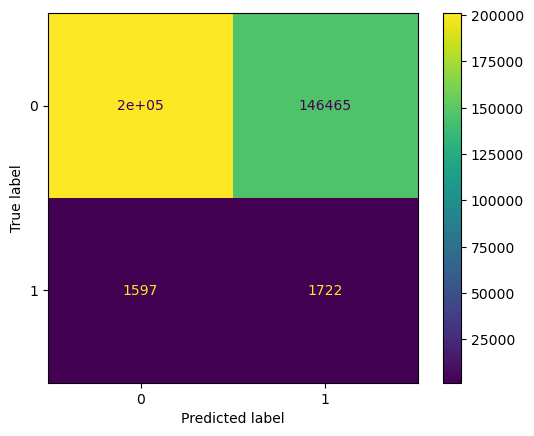

In [213]:
cmd_1 = ConfusionMatrixDisplay(cm_1)
cmd_1.plot()
plt.show()

In [214]:
# Run GridSearch

model_1_gridsearch = GridSearchCV(estimator = LogisticRegression(random_state = 42, class_weight = 'balanced'),
                          param_grid = params,
                          cv = 5,
                          scoring = "roc_auc")

In [215]:
model_1_gridsearch.fit(x_train_1, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

In [216]:
# Find the best params

best_params = model_1_gridsearch.best_params_
best_params

{'C': 1000}

In [217]:
# Find the best score
best_score = model_1_gridsearch.best_score_
best_score

0.5603613917109875

In [218]:
best_model = LogisticRegression(random_state = 42, class_weight = 'balanced', C=best_params['C']).fit(x_train_1, y_train)

# Testing

## Test Data

In [219]:
woe_test

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
159164,0.040767,-0.015797,-0.142206,0.017927,-0.056615,0.014465,0.017628,-0.102874,0.018911,0.050962,-0.034539,0.0,0.036356,0.004361,-0.005061,-0.217058,0.016371
43048,-0.078638,0.027299,-0.142206,0.017927,-0.056615,-0.104330,0.022513,-0.009315,0.018911,0.009459,-0.018477,0.0,0.036356,0.004361,-0.005061,0.000856,0.030972
369264,0.040767,-0.015797,-0.142206,0.017927,-0.014483,-0.096141,0.017628,0.010092,-0.260872,0.050962,-0.011069,0.0,0.036356,0.004361,-0.005061,-0.217058,0.030972
82601,0.040767,-0.015797,0.069684,0.017927,0.013858,0.014465,0.017628,-0.009315,0.018911,0.050962,-0.034539,0.0,-0.128885,0.004361,-0.005061,0.000856,0.030972
29039,0.040767,-0.015797,-0.142206,0.017927,-0.014483,0.014465,0.022513,-0.102874,0.018911,-0.168104,-0.068226,0.0,0.036356,-0.010719,-0.005061,0.000856,0.016371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175834,-0.078638,-0.015797,0.069684,0.017927,0.043395,0.014465,0.017628,-0.009315,0.018911,0.050962,-0.018477,0.0,0.036356,0.004361,-0.005061,0.055894,0.016371
42471,-0.078638,-0.015797,-0.142206,-0.141998,-0.014483,-0.096141,0.017628,-0.009315,-0.042785,0.009459,-0.068226,0.0,-0.128885,-0.010719,-0.005061,0.055894,-0.161920
365365,-0.078638,0.027299,0.069684,0.017927,-0.056615,0.014465,0.022513,-0.009315,0.018911,0.009459,-0.018477,0.0,0.036356,0.004361,-0.005061,0.000856,0.030972
252443,0.040767,-0.015797,0.069684,0.017927,-0.014483,-0.104330,0.022513,-0.009315,0.018911,-0.168104,-0.034539,0.0,0.036356,-0.010719,0.042729,-0.081662,0.030972


In [220]:
y_test

159164    0
43048     0
369264    0
82601     0
29039     0
         ..
175834    0
42471     1
365365    0
252443    0
102978    0
Name: status, Length: 87712, dtype: int64

## Scaling Dataset

In [221]:
scaler_x_test = preprocessing.StandardScaler().fit(woe_test)

In [222]:
scaler_x_test.mean_

array([1.39631874e-03, 3.04787955e-04, 4.35264287e-03, 9.48328782e-04,
       5.11033159e-04, 3.06792039e-03, 3.59682440e-03, 2.58124444e-03,
       2.81785577e-03, 5.91571395e-03, 2.49259673e-03, 0.00000000e+00,
       2.42475508e-03, 1.60222614e-05, 1.25774055e-04, 8.41748551e-03,
       1.18451529e-03])

In [223]:
scaler_x_test.scale_

array([0.05613399, 0.02084807, 0.09785146, 0.04926473, 0.03640814,
       0.0870403 , 0.07805054, 0.07699246, 0.06931113, 0.10941299,
       0.08135037, 1.        , 0.06674902, 0.0068295 , 0.01486461,
       0.13977893, 0.05452105])

In [224]:
x_test_scaled = scaler_x_test.transform(woe_test)
x_test_scaled

array([[ 0.70137653, -0.77231873, -1.49776741, ..., -0.34890864,
        -1.6130844 ,  0.27854564],
       [-1.4257677 ,  1.29480221, -1.49776741, ..., -0.34890864,
        -0.05409332,  0.54634165],
       [ 0.70137653, -0.77231873, -1.49776741, ..., -0.34890864,
        -1.6130844 ,  0.54634165],
       ...,
       [-1.4257677 ,  1.29480221,  0.66766041, ..., -0.34890864,
        -0.05409332,  0.54634165],
       [ 0.70137653, -0.77231873,  0.66766041, ...,  2.86607978,
        -0.64444405,  0.54634165],
       [-1.4257677 , -0.77231873, -1.49776741, ..., -0.34890864,
         0.10677448,  0.54634165]])

In [225]:
x_test_scaled.mean(axis=0)

array([-4.34206159e-17, -7.93884396e-17, -6.65890789e-17, -3.88031250e-17,
        5.67060283e-18, -6.31867172e-17,  9.10536797e-17,  1.06931368e-17,
        2.43025835e-17, -3.37805911e-17,  3.45096686e-17,  0.00000000e+00,
        2.21963596e-17,  4.63369259e-17,  2.98921778e-17, -1.05311195e-17,
        6.20525966e-17])

In [226]:
x_test_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [227]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=woe_test.columns)
x_test_scaled

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0.701377,-0.772319,-1.497767,0.344638,-1.569050,0.130944,0.179765,-1.369682,0.232185,0.411711,-0.455208,0.0,0.508334,0.636210,-0.348909,-1.613084,0.278546
1,-1.425768,1.294802,-1.497767,0.344638,-1.569050,-1.233885,0.242357,-0.154510,0.232185,0.032383,-0.257767,0.0,0.508334,0.636210,-0.348909,-0.054093,0.546342
2,0.701377,-0.772319,-1.497767,0.344638,-0.411841,-1.139808,0.179765,0.097547,-3.804445,0.411711,-0.166709,0.0,0.508334,0.636210,-0.348909,-1.613084,0.546342
3,0.701377,-0.772319,0.667660,0.344638,0.366604,0.130944,0.179765,-0.154510,0.232185,0.411711,-0.455208,0.0,-1.967209,0.636210,-0.348909,-0.054093,0.546342
4,0.701377,-0.772319,-1.497767,0.344638,-0.411841,0.130944,0.242357,-1.369682,0.232185,-1.590487,-0.869313,0.0,0.508334,-1.571808,-0.348909,-0.054093,0.278546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87707,-1.425768,-0.772319,0.667660,0.344638,1.177860,0.130944,0.179765,-0.154510,0.232185,0.411711,-0.257767,0.0,0.508334,0.636210,-0.348909,0.339656,0.278546
87708,-1.425768,-0.772319,-1.497767,-2.901593,-0.411841,-1.139808,0.179765,-0.154510,-0.657946,0.032383,-0.869313,0.0,-1.967209,-1.571808,-0.348909,0.339656,-2.991596
87709,-1.425768,1.294802,0.667660,0.344638,-1.569050,0.130944,0.242357,-0.154510,0.232185,0.032383,-0.257767,0.0,0.508334,0.636210,-0.348909,-0.054093,0.546342
87710,0.701377,-0.772319,0.667660,0.344638,-0.411841,-1.233885,0.242357,-0.154510,0.232185,-1.590487,-0.455208,0.0,0.508334,-1.571808,2.866080,-0.644444,0.546342


In [228]:
x_test_scaled = x_test_scaled.iloc[:, model_1_features]
x_test_scaled

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0.701377,-0.772319,-1.497767,0.344638,-1.569050,0.130944,0.179765,-1.369682,0.232185,0.411711,-0.455208,-0.348909,-1.613084,0.278546
1,-1.425768,1.294802,-1.497767,0.344638,-1.569050,-1.233885,0.242357,-0.154510,0.232185,0.032383,-0.257767,-0.348909,-0.054093,0.546342
2,0.701377,-0.772319,-1.497767,0.344638,-0.411841,-1.139808,0.179765,0.097547,-3.804445,0.411711,-0.166709,-0.348909,-1.613084,0.546342
3,0.701377,-0.772319,0.667660,0.344638,0.366604,0.130944,0.179765,-0.154510,0.232185,0.411711,-0.455208,-0.348909,-0.054093,0.546342
4,0.701377,-0.772319,-1.497767,0.344638,-0.411841,0.130944,0.242357,-1.369682,0.232185,-1.590487,-0.869313,-0.348909,-0.054093,0.278546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87707,-1.425768,-0.772319,0.667660,0.344638,1.177860,0.130944,0.179765,-0.154510,0.232185,0.411711,-0.257767,-0.348909,0.339656,0.278546
87708,-1.425768,-0.772319,-1.497767,-2.901593,-0.411841,-1.139808,0.179765,-0.154510,-0.657946,0.032383,-0.869313,-0.348909,0.339656,-2.991596
87709,-1.425768,1.294802,0.667660,0.344638,-1.569050,0.130944,0.242357,-0.154510,0.232185,0.032383,-0.257767,-0.348909,-0.054093,0.546342
87710,0.701377,-0.772319,0.667660,0.344638,-0.411841,-1.233885,0.242357,-0.154510,0.232185,-1.590487,-0.455208,2.866080,-0.644444,0.546342


In [229]:
y_test = y_test.ravel()
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model

In [230]:
model_test = LogisticRegression(random_state = 42, class_weight='balanced', C=best_params['C']).fit(x_test_scaled, y_test)

In [231]:
model_test.predict_proba(x_test_scaled)

array([[0.38571971, 0.61428029],
       [0.41377823, 0.58622177],
       [0.45098799, 0.54901201],
       ...,
       [0.53598928, 0.46401072],
       [0.50880099, 0.49119901],
       [0.44376334, 0.55623666]])

In [232]:
model_test.score(x_test_scaled, y_test)

0.5874452754469172

In [233]:
cv_result_test = cross_validate(estimator = model_test,
                          X = x_test_scaled,
                          y = y_test,
                          scoring = 'roc_auc',
                          cv = 5)
cv_result_test['test_score']

array([0.56199772, 0.55801482, 0.55163558, 0.52467293, 0.53858476])

In [234]:
cv_mean_score_test = np.mean(cv_result_test['test_score'])
cv_mean_score_test

0.546981162073646

In [235]:
# Predict class labels for sample in x_train

y_test_pred = model_test.predict(x_test_scaled)
y_test_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [236]:
# Calculate the recall score on the train set
recall_test = recall_score(y_true = y_test,
                            y_pred = y_test_pred)

recall_test

0.5349397590361445

In [237]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[51082, 35800],
       [  386,   444]], dtype=int64)

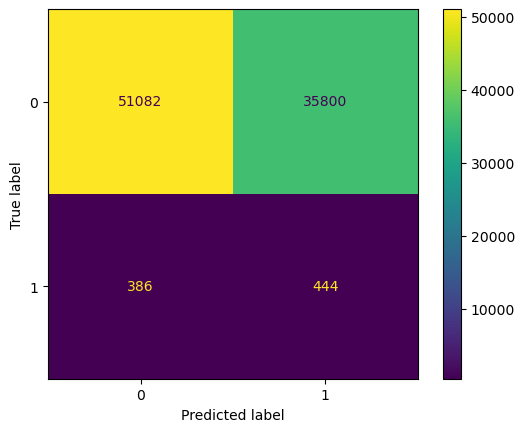

In [238]:
cmd_test = ConfusionMatrixDisplay(cm_test)
cmd_test.plot()
plt.show()

# Scoring

## Model Summary

In [239]:
intercept = best_model.intercept_
intercept

array([-0.02507431])

In [240]:
best_model_intercept = pd.DataFrame({'Characteristic': 'Intercept',
                                     'Estimate': intercept})
best_model_intercept

,Characteristic,Estimate
0,Intercept,-0.025074


In [241]:
best_predictors = x_test_scaled.columns.tolist()
best_predictors

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'AGE',
 'WORKING_YEARS',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS']

In [242]:
coef = best_model.coef_
coef

array([[-0.04225871, -0.05272969, -0.07722151,  0.07421248, -0.03676999,
        -0.04166126, -0.06660593, -0.05024915, -0.03508839, -0.06178949,
         0.08269335, -0.03117787, -0.13714329, -0.11470358]])

In [243]:
best_model_coefs = pd.DataFrame({'Characteristic':best_predictors,
                                 'Estimate':coef[0]})

best_model_summary = pd.concat((best_model_intercept, best_model_coefs),
                               axis = 0,
                               ignore_index = True)

best_model_summary

,Characteristic,Estimate
0,Intercept,-0.025074
1,CODE_GENDER,-0.042259
2,FLAG_OWN_CAR,-0.052730
3,FLAG_OWN_REALTY,-0.077222
4,CNT_CHILDREN,0.074212
5,AMT_INCOME_TOTAL,-0.036770
6,NAME_INCOME_TYPE,-0.041661
7,NAME_EDUCATION_TYPE,-0.066606
8,NAME_FAMILY_STATUS,-0.050249
9,NAME_HOUSING_TYPE,-0.035088


## Updating Model with Factor and Offset

In [244]:
# Define Factor and Offset
factor = 20/np.log(2)
offset = 300-(factor*np.log(30))

In [245]:
# Define n = number of characteristics
n = len(best_predictors)

# Define b0
b0 = intercept

n, b0

(14, array([-0.02507431]))

In [246]:
# Define numerical predictors

num_var = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'WORKING_YEARS', 'CNT_FAM_MEMBERS']

In [247]:
# Load WOE_table

WOE_table

,Characteristic,Attribute,WOE
0,CNT_CHILDREN_bin,"(-0.001, 1.0]",0.017927
1,CNT_CHILDREN_bin,"(1.0, 19.0]",-0.141998
0,AMT_INCOME_TOTAL_bin,"(26099.999, 121500.0]",0.013858
1,AMT_INCOME_TOTAL_bin,"(121500.0, 157500.0]",-0.014483
2,AMT_INCOME_TOTAL_bin,"(157500.0, 225000.0]",0.043395
...,...,...,...
15,OCCUPATION_TYPE,Sales staff,0.023342
16,OCCUPATION_TYPE,Secretaries,0.805975
17,OCCUPATION_TYPE,Security staff,-0.157736
18,OCCUPATION_TYPE,Unknown,0.000856


## Scorecards

In [248]:
# Adjust characteristic name in best_model_summary_table
for col in best_predictors:
    if col in num_var:
        bin_col = col + '_bin'
    else:
        bin_col = col
    best_model_summary.replace(col, bin_col, inplace = True)


# Merge tables to get beta_i for each characteristic
scorecards = pd.merge(left = WOE_table,
                      right = best_model_summary,
                      how = 'left',
                      on = ['Characteristic'])

scorecards.head()

,Characteristic,Attribute,WOE,Estimate
0,CNT_CHILDREN_bin,"(-0.001, 1.0]",0.017927,0.074212
1,CNT_CHILDREN_bin,"(1.0, 19.0]",-0.141998,0.074212
2,AMT_INCOME_TOTAL_bin,"(26099.999, 121500.0]",0.013858,-0.036770
3,AMT_INCOME_TOTAL_bin,"(121500.0, 157500.0]",-0.014483,-0.036770
4,AMT_INCOME_TOTAL_bin,"(157500.0, 225000.0]",0.043395,-0.036770


In [249]:
scorecards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Characteristic  72 non-null     object 
 1   Attribute       72 non-null     object 
 2   WOE             72 non-null     float64
 3   Estimate        67 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.8+ KB


In [250]:
scorecards[scorecards['Estimate'].isna()]

,Characteristic,Attribute,WOE,Estimate
45,FLAG_MOBIL,1,0.000000,NaN
46,FLAG_WORK_PHONE,0,0.036356,NaN
47,FLAG_WORK_PHONE,1,-0.128885,NaN
48,FLAG_PHONE,0,0.004361,NaN
49,FLAG_PHONE,1,-0.010719,NaN


In [251]:
scorecards = scorecards.dropna()
scorecards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 71
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Characteristic  67 non-null     object 
 1   Attribute       67 non-null     object 
 2   WOE             67 non-null     float64
 3   Estimate        67 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.6+ KB


In [252]:
# Define beta and WOE

beta = scorecards['Estimate']
WOE = scorecards['WOE']

# Calculate the score point for each attribute
scorecards['Points'] = (offset/n) - factor*((b0/n) + (beta*WOE))

scorecards.head()

,Characteristic,Attribute,WOE,Estimate,Points
0,CNT_CHILDREN_bin,"(-0.001, 1.0]",0.017927,0.074212,14.432019
1,CNT_CHILDREN_bin,"(1.0, 19.0]",-0.141998,0.074212,14.774469
2,AMT_INCOME_TOTAL_bin,"(26099.999, 121500.0]",0.013858,-0.036770,14.485109
3,AMT_INCOME_TOTAL_bin,"(121500.0, 157500.0]",-0.014483,-0.036770,14.455040
4,AMT_INCOME_TOTAL_bin,"(157500.0, 225000.0]",0.043395,-0.036770,14.516446


In [253]:
# Calculate the min and max points for each characteristic
grouped_char = scorecards.groupby('Characteristic')
grouped_points = grouped_char['Points'].agg(['min', 'max'])
grouped_points

,min,max
Characteristic,,
AGE_bin,14.170698,14.705421
AMT_INCOME_TOTAL_bin,14.410339,14.516446
CNT_CHILDREN_bin,14.432019,14.774469
CNT_FAM_MEMBERS_bin,13.934506,14.572911
CODE_GENDER,14.374520,14.520115
FLAG_EMAIL,14.465853,14.508845
FLAG_OWN_CAR,14.446372,14.511940
FLAG_OWN_REALTY,14.153550,14.625672
NAME_EDUCATION_TYPE,13.392240,14.513672


In [254]:
# Calculate the min and max score from the scorecards
total_points = grouped_points.sum()
min_score = total_points['min']
max_score = total_points['max']

print(f"The lowest credit score = {min_score}")
print(f"The highest credit score = {max_score}")

The lowest credit score = 193.45198488927898
The highest credit score = 207.78036148954388


In [255]:
# Function to generate the points map dictionary
def get_points_map_dict(scorecards):

    # Initialize the dictionary
    points_map_dict = {}
    points_map_dict['Missing'] = {}
    unique_char = set(scorecards['Characteristic'])
    for char in unique_char:
        # Get the Attribute & WOE info for each characteristics
        current_data = (scorecards
                            [scorecards['Characteristic']==char]     # Filter based on characteristic
                            [['Attribute', 'Points']])               # Then select the attribute & WOE

        # Get the mapping
        points_map_dict[char] = {}
        for idx in current_data.index:
            attribute = current_data.loc[idx, 'Attribute']
            points = current_data.loc[idx, 'Points']

            if attribute == 'Missing':
                points_map_dict['Missing'][char] = points
            else:
                points_map_dict[char][attribute] = points
                points_map_dict['Missing'][char] = np.nan

    return points_map_dict


In [256]:
# Generate the points map dict
points_map_dict = get_points_map_dict(scorecards = scorecards)
points_map_dict

{'Missing': {'NAME_EDUCATION_TYPE': nan,
  'NAME_INCOME_TYPE': nan,
  'FLAG_OWN_CAR': nan,
  'FLAG_OWN_REALTY': nan,
  'CNT_FAM_MEMBERS_bin': nan,
  'CODE_GENDER': nan,
  'NAME_FAMILY_STATUS': nan,
  'NAME_HOUSING_TYPE': nan,
  'AGE_bin': nan,
  'AMT_INCOME_TOTAL_bin': nan,
  'WORKING_YEARS_bin': 14.047869651361067,
  'FLAG_EMAIL': nan,
  'OCCUPATION_TYPE': nan,
  'CNT_CHILDREN_bin': nan},
 'NAME_EDUCATION_TYPE': {'Academic degree': 13.392239959079669,
  'Higher education': 14.513671875192541,
  'Incomplete higher': 13.694064546005977,
  'Lower secondary': 14.340189935581584,
  'Secondary / secondary special': 14.504283052577188},
 'NAME_INCOME_TYPE': {'Commercial associate': 14.354835168371718,
  'Pensioner': 14.658526021427999,
  'State servant': 14.344991945359036,
  'Student': 11.761759798650115,
  'Working': 14.487794318288131},
 'FLAG_OWN_CAR': {0: 14.446371891730049, 1: 14.511939811472352},
 'FLAG_OWN_REALTY': {0: 14.153550362686701, 1: 14.625671943688056},
 'CNT_FAM_MEMBERS_bin

In [257]:
input = {'CODE_GENDER':'M',
 'FLAG_OWN_CAR':1,
 'FLAG_OWN_REALTY':0,
 'NAME_INCOME_TYPE':'Working',
 'NAME_EDUCATION_TYPE':'Higher education',
 'NAME_FAMILY_STATUS':'Married',
 'NAME_HOUSING_TYPE':'House / apartment',
 'FLAG_EMAIL':0,
 'OCCUPATION_TYPE':'Sales staff',
 'CNT_CHILDREN':2,
 'AMT_INCOME_TOTAL':100000,
 'AGE':30,
 'WORKING_YEARS':5,
 'CNT_FAM_MEMBERS':1}

In [258]:
def transform_points(raw_data, points_map_dict, num_cols):

    points_data = raw_data.copy()

    # Map the data
    for col in points_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        points_data[col] = points_data[col].map(points_map_dict[map_col])

    # Map the data if there is a missing value or out of range value
    for col in points_data.columns:
        if col in num_cols:
            map_col = col + '_bin'
        else:
            map_col = col

        points_data[col] = points_data[col].fillna(value=points_map_dict['Missing'][map_col])

    return points_data

In [259]:
input_table = pd.DataFrame(input, index=[0])
input_points = transform_points(raw_data = input_table,
                                points_map_dict = points_map_dict,
                                num_cols = num_var)

input_points

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,WORKING_YEARS,CNT_FAM_MEMBERS
0,14.37452,14.51194,14.15355,14.487794,14.513672,14.4569,14.489552,14.465853,14.562774,14.774469,14.485109,14.170698,14.633195,14.524588


In [260]:
# Function to predict the credit score
def predict_score(raw_data, cutoff_score):

    # Transform raw input values into score points
    points = transform_points(raw_data = raw_data,
                              points_map_dict = points_map_dict,
                              num_cols = num_var)

    # Caculate the score as the total points
    score = int(points.sum(axis=1))

    print(f"Credit Score : ", score)

    if score > cutoff_score:
        print("Recommendation : APPROVE")
    else:
        print("Recommendation : REJECT")

    return score

In [261]:
input_score = predict_score(raw_data = input_table,
                            cutoff_score = 205)

Credit Score :  202
Recommendation : REJECT


In [270]:
# Transform the raw values in x_train into points
train_points = transform_points(raw_data = data_train.drop(['ID', 'status','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_MOBIL', 'CNT_CHILDREN_bin', 'AMT_INCOME_TOTAL_bin', 'AGE_bin', 'WORKING_YEARS_bin', 'CNT_FAM_MEMBERS_bin'], axis=1),
                                points_map_dict = points_map_dict,
                                num_cols = num_var)

train_points.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
54587,14.520115,14.446372,14.625672,14.432019,14.485109,14.354835,14.504283,14.456900,14.489552,14.561265,14.496817,14.465853,14.562774,14.524588
305952,14.520115,14.511940,14.625672,14.432019,14.455040,14.354835,14.513672,14.485037,14.489552,14.561265,14.514492,14.465853,14.147259,14.524588
152363,14.374520,14.446372,14.625672,14.432019,14.410339,14.354835,14.513672,14.456900,14.489552,14.487270,14.552816,14.465853,13.822712,14.524588
105979,14.520115,14.446372,14.625672,14.432019,14.455040,14.354835,14.504283,14.456900,14.489552,14.487270,14.633195,14.465853,14.147259,14.572911
5853,14.520115,14.446372,14.625672,14.432019,14.410339,14.344992,14.504283,14.852576,14.489552,14.561265,14.514492,14.465853,14.147259,14.524588


In [271]:
# Calculate the total score
train_points['SCORE'] = train_points.sum(axis=1).astype(int)
train_points.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,SCORE
54587,14.520115,14.446372,14.625672,14.432019,14.485109,14.354835,14.504283,14.456900,14.489552,14.561265,14.496817,14.465853,14.562774,14.524588,202
305952,14.520115,14.511940,14.625672,14.432019,14.455040,14.354835,14.513672,14.485037,14.489552,14.561265,14.514492,14.465853,14.147259,14.524588,202
152363,14.374520,14.446372,14.625672,14.432019,14.410339,14.354835,14.513672,14.456900,14.489552,14.487270,14.552816,14.465853,13.822712,14.524588,201
105979,14.520115,14.446372,14.625672,14.432019,14.455040,14.354835,14.504283,14.456900,14.489552,14.487270,14.633195,14.465853,14.147259,14.572911,202
5853,14.520115,14.446372,14.625672,14.432019,14.410339,14.344992,14.504283,14.852576,14.489552,14.561265,14.514492,14.465853,14.147259,14.524588,202


In [264]:
# Transform the raw values in x_test into points
# Excluding characteristics not used based on Model 1
test_points = transform_points(raw_data = data_test.drop(['ID', 'status', 'FLAG_WORK_PHONE','FLAG_PHONE','FLAG_MOBIL','CNT_CHILDREN_bin', 'AMT_INCOME_TOTAL_bin', 'AGE_bin', 'WORKING_YEARS_bin', 'CNT_FAM_MEMBERS_bin'], axis=1),
                                points_map_dict = points_map_dict,
                                num_cols = num_var)

test_points.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
159164,14.520115,14.446372,14.153550,14.432019,14.410339,14.487794,14.504283,14.321250,14.489552,14.561265,14.552816,14.465853,13.611482,14.524588
43048,14.374520,14.511940,14.153550,14.432019,14.410339,14.344992,14.513672,14.456900,14.489552,14.487270,14.514492,14.465853,14.473794,14.572911
369264,14.520115,14.446372,14.153550,14.432019,14.455040,14.354835,14.504283,14.485037,14.206289,14.561265,14.496817,14.465853,13.611482,14.572911
82601,14.520115,14.446372,14.625672,14.432019,14.485109,14.487794,14.504283,14.456900,14.489552,14.561265,14.552816,14.465853,14.473794,14.572911
29039,14.520115,14.446372,14.153550,14.432019,14.455040,14.487794,14.513672,14.321250,14.489552,14.170698,14.633195,14.465853,14.473794,14.524588


In [273]:
# Calculate the total score
test_points['SCORE'] = test_points.sum(axis=1).astype(int)
test_points.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,WORKING_YEARS,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,SCORE
159164,14.520115,14.446372,14.153550,14.432019,14.410339,14.487794,14.504283,14.321250,14.489552,14.561265,14.552816,14.465853,13.611482,14.524588,201
43048,14.374520,14.511940,14.153550,14.432019,14.410339,14.344992,14.513672,14.456900,14.489552,14.487270,14.514492,14.465853,14.473794,14.572911,202
369264,14.520115,14.446372,14.153550,14.432019,14.455040,14.354835,14.504283,14.485037,14.206289,14.561265,14.496817,14.465853,13.611482,14.572911,201
82601,14.520115,14.446372,14.625672,14.432019,14.485109,14.487794,14.504283,14.456900,14.489552,14.561265,14.552816,14.465853,14.473794,14.572911,203
29039,14.520115,14.446372,14.153550,14.432019,14.455040,14.487794,14.513672,14.321250,14.489552,14.170698,14.633195,14.465853,14.473794,14.524588,202


<AxesSubplot:xlabel='SCORE', ylabel='Count'>

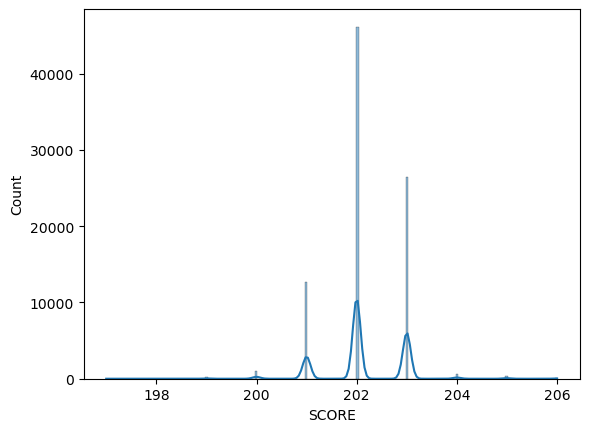

In [274]:
# Distribution plot of predicted score
sns.histplot(x = test_points['SCORE'],
             kde = True)

In [276]:
cutoff_list = []
approval_rate_list = []

for cutoff in range (int(min_score), int(max_score)):

  cutoff_list.append(cutoff)

  approve_counts = len(train_points[train_points['SCORE'] >= cutoff])
  n_sample = len(train_points)

  approval_rate = approve_counts/n_sample

  approval_rate_list.append(approval_rate)

approval_rate_table = pd.DataFrame({'Cutoff' : cutoff_list,
                                    'Expected Approval Rate' : approval_rate_list})

approval_rate_table

,Cutoff,Expected Approval Rate
0,193,1.000000
1,194,1.000000
2,195,1.000000
3,196,1.000000
4,197,1.000000
5,198,0.999994
6,199,0.999709
7,200,0.997651
8,201,0.985541
9,202,0.842854


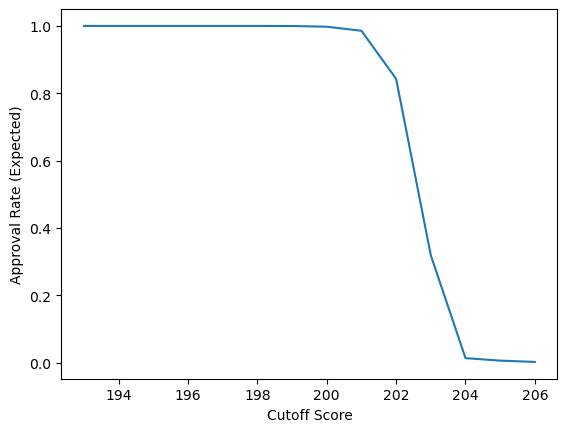

In [277]:
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

plt.xlabel('Cutoff Score')
plt.ylabel('Approval Rate (Expected)')
plt.show()

In [278]:
cutoff_list = []
bad_rate_list = []

for cutoff in range (int(min_score), int(max_score)):

  cutoff_list.append(cutoff)

  bad_counts = len(train_points[train_points['SCORE'] < cutoff])
  n_sample = len(train_points)

  bad_rate = bad_counts/n_sample

  bad_rate_list.append(bad_rate)

bad_rate_table = pd.DataFrame({'Cutoff' : cutoff_list,
                               'Expected Bad Rate' : bad_rate_list})

bad_rate_table

,Cutoff,Expected Bad Rate
0,193,0.000000
1,194,0.000000
2,195,0.000000
3,196,0.000000
4,197,0.000000
5,198,0.000006
6,199,0.000291
7,200,0.002349
8,201,0.014459
9,202,0.157146


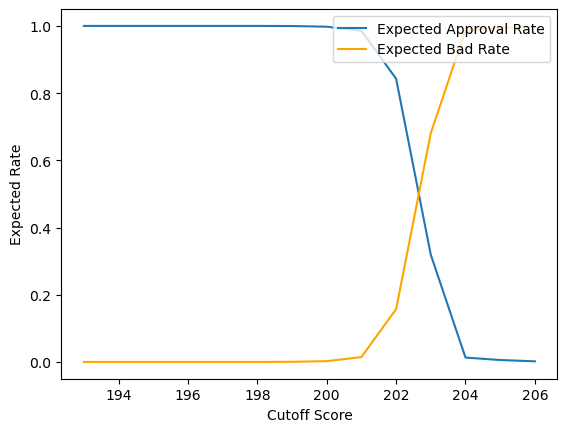

In [279]:
# Plot the approval rate
plt.plot(approval_rate_table['Cutoff'],
         approval_rate_table['Expected Approval Rate'],
         label = "Expected Approval Rate")

# Plot the expected bad rate
plt.plot(bad_rate_table['Cutoff'],
         bad_rate_table['Expected Bad Rate'],
         label = "Expected Bad Rate",
         color = 'orange')

plt.ylabel("Expected Rate")
plt.xlabel("Cutoff Score")
plt.legend(loc = 1)
plt.show()